# Build ML models - for mostly full 7 KBps window

# Day 6 CRISPRoff vs. unedited

In [3]:
# !  python3 -m pip install tensorflow
# !  python3 -m pip install keras
# ! python3 -m pip install 'scikit-learn'
# ! python3 -m pip install shap

In [4]:
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.ensemble import *
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.svm import SVC, SVR
from sklearn.neural_network import MLPClassifier, MLPRegressor
from sklearn.model_selection import train_test_split
from sklearn.inspection import permutation_importance
import sklearn
import shap

from matplotlib import pyplot as plt 
import seaborn as sns
import pandas as pd
import numpy as np
import time

import sys
# Add the folder containing 'my_functions.py' to sys.path
sys.path.append("/home/michalula/code/epiCausality/epiCode/utils/") # str(Path(__file__).parent / 'utils'))

# # Import the module or specific functions
# # from /home/michalula/code/epiCausality/epiCode/utils/funcs_extract_mC_profiles_from_BAMs.py
# # from funcs_extract_mC_profiles_from_BAMs import system_info, extract_from_bam
# from funcs_extract_mC_profiles_from_BAMs import (
#     system_info,
#     get_reference_sequence,
#     create_output_directory,
#     extract_from_bam,
#     process_extracted_reads,
#     visualize_data,
#     create_padded_reads,
#     plot_padded_reads,
#     save_padded_reads,
#     remove_low_methylated_reads,
#     process_extracted_reads_no_fully_unmethylated,
#     create_padded_reads_no_fully_unmethylated,
#     current_time
#     # main,
# )
from funcs_analize_forward_reverse_extracted_mC_reads import analize_forward_reverse_CGs_pipeline, load_padded_reads


current_time = time.strftime("%Y-%m-%d %H:%M:%S", time.localtime())
print("Current Date and Time:", current_time)


def get_fractions(CGs_pd):
    CGs_sums = np.nansum(CGs_pd, axis=0) 
    CGs_fracs = CGs_sums  / len(CGs_pd) 
    return CGs_fracs


modkit found with expected version 0.2.4
Current Date and Time: 2025-10-14 13:09:43


In [5]:
# From /home/michalula/code/epiCausality/epiCode/PIPELINE_extract_plot_mCG_strands_profiles_bigger_window.ipynb
# CGs_all saved as CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy in dimelo_v2_output
# Pipeline executed successfully (analize_forward_reverse_CGs_pipeline function)

In [6]:

# Day 6 post ElectroPoration (EP)
## Unedited D6
save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD490_numRVS644.npy"

CGs_D6_unedited_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D6_unedited_mc07_fracs = get_fractions(CGs_D6_unedited_mc07)
print("CGs_D6_unedited_mc07 shape: ", CGs_D6_unedited_mc07.shape)
print("CGs_D6_unedited_mc07_fracs shape: ", CGs_D6_unedited_mc07_fracs.shape)

save_folder_path = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/"
save_padded_reads_name_np = save_folder_path + "CG_137_padded_reads_day6_unedited_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD489_numRVS638.npy"
CGs_D6_unedited_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)
CGs_D6_unedited_mc0995_fracs = get_fractions(CGs_D6_unedited_mc0995)
print("CGs_D6_unedited_mc0995 shape: ", CGs_D6_unedited_mc0995.shape)
print("CGs_D6_unedited_mc0995_fracs shape: ", CGs_D6_unedited_mc0995_fracs.shape)   


## CRISPRoff Day 6 
save_padded_reads_name_np =  "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_mC0.7_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.7_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD802_numRVS1480.npy"
CGs_D6_CRoff_mc07 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D6_CRoff_mc07_fracs = get_fractions(CGs_D6_CRoff_mc07)
print("CGs_D6_CRoff_mc07 shape: ", CGs_D6_CRoff_mc07.shape)
print("CGs_D6_CRoff_mc07_fracs shape: ", CGs_D6_CRoff_mc07_fracs.shape)


save_padded_reads_name_np = "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/" +\
     'CG_137_padded_reads_day6_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_modBaseQ10_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-29_units_combined_numFWD793_numRVS1449.npy'
# "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD652_numRVS1125.npy"
CGs_D6_CRoff_mc0995 = load_padded_reads(save_folder_path, save_padded_reads_name_np)

CGs_D6_CRoff_mc0995_fracs = get_fractions(CGs_D6_CRoff_mc0995)
print("CGs_D6_CRoff_mc0995 shape: ", CGs_D6_CRoff_mc0995.shape)
print("CGs_D6_CRoff_mc0995_fracs shape: ", CGs_D6_CRoff_mc0995_fracs.shape)     




Padded reads loaded successfully.
CGs_D6_unedited_mc07 shape:  (1134, 137)
CGs_D6_unedited_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D6_unedited_mc0995 shape:  (1127, 137)
CGs_D6_unedited_mc0995_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D6_CRoff_mc07 shape:  (2282, 137)
CGs_D6_CRoff_mc07_fracs shape:  (137,)
Padded reads loaded successfully.
CGs_D6_CRoff_mc0995 shape:  (2242, 137)
CGs_D6_CRoff_mc0995_fracs shape:  (137,)


In [7]:
CGs_all_silenced = CGs_D6_CRoff_mc0995.copy()
CGs_all_silenced, CGs_all_silenced.shape

(array([[ 1.,  1., nan, ...,  1., nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan,  1., nan, ..., nan, nan, nan],
        [nan,  1.,  1., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 (2242, 137))

In [8]:
# CGs_all_silenced = np.load("/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_CRoff_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD652_numRVS1125.npy")
    # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/croff/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day28_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD5_numRVS6.npy")
    # "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Theshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_silenced_T_primerES_nCATS_numFWD5860_numRVS4229_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy

# 106 CpG units:
# Theshold 0.7 = # (
# Theshold 0.9 =   /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_silenced_T_primerES_nCATS_numFWD5306_numRVS3749_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4723_numRVS3383_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Theshold 0.9 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_silenced_T_primerES_nCATS_numFWD4511_numRVS3269_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4478_numRVS3217_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 =(("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_silenced_T_primerES_nCATS_numFWD4220_numRVS3073_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
#
# ('/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')
# Silenced T cells nCATS:
# Threshold 0.7 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD4132_numRVS2965_padded_reads_silenced_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# # Threshold 0.9 =( '/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_silenced_T_primerES_nCATS_numFWD3852_numRVS2805_padded_reads_silenced_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy')

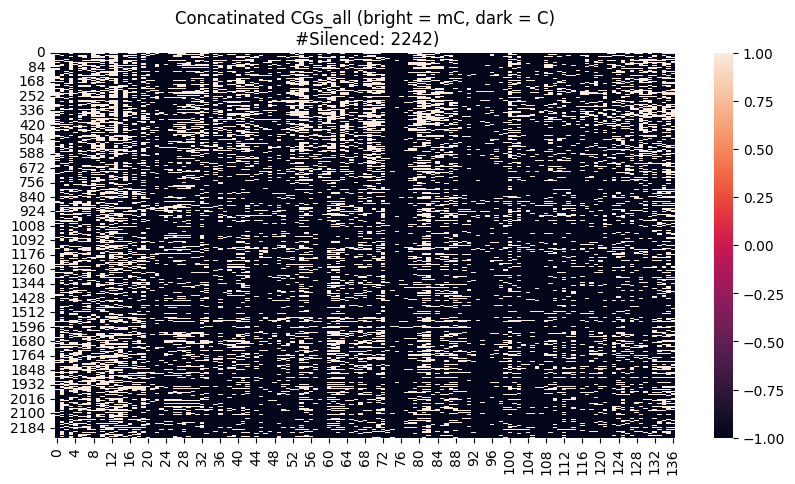

In [9]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


<Figure size 1000x500 with 0 Axes>

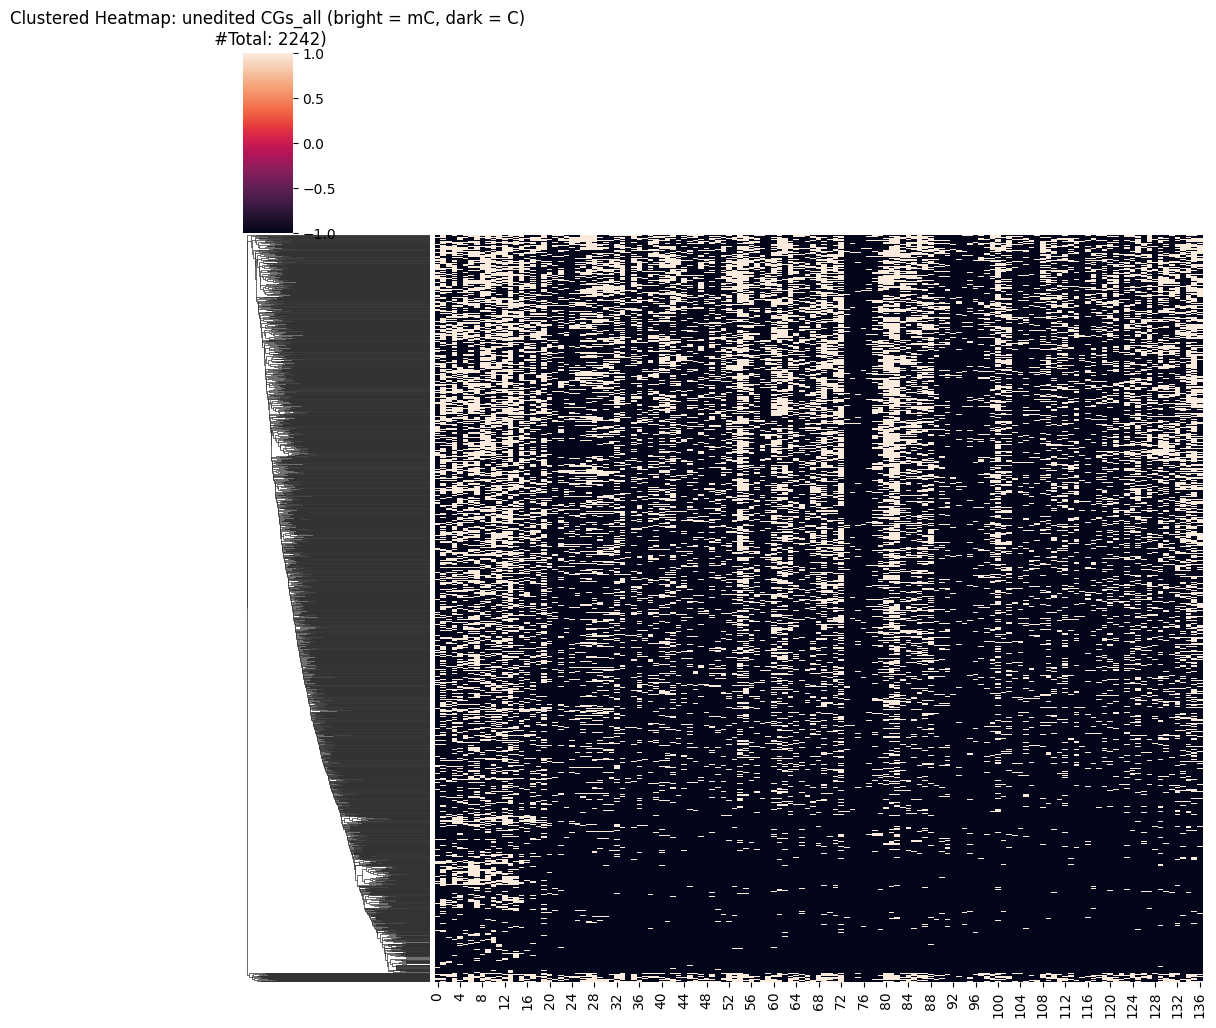

In [10]:
# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_silenced).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced.shape[0]})")
plt.show()

In [11]:
CGs_all_silenced_full = CGs_all_silenced.copy()
CGs_all_silenced_full, CGs_all_silenced_full.shape

(array([[ 1.,  1., nan, ...,  1., nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [nan,  1., nan, ..., nan, nan, nan],
        [nan,  1.,  1., ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 (2242, 137))

# Remove the Reads (raws) that have very low methylation sum    

Total reads before filtering: 2242
Reads with zero covered CpGs: 0
Removed 573 reads <= 10.0% methylation (among covered CpGs).
Total reads after filtering: 1669


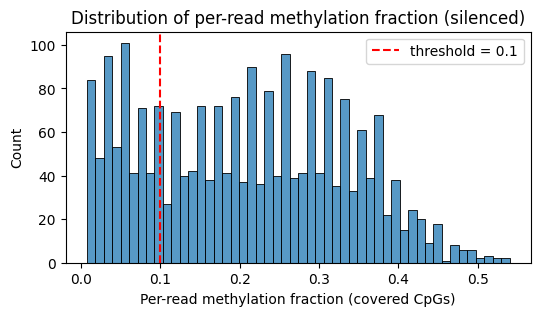

In [12]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.1  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_silenced), axis=1)
methyl_counts = np.nansum(CGs_all_silenced == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_silenced.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_silenced.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_silenced_filtered = CGs_all_silenced[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_silenced_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

<Figure size 1000x500 with 0 Axes>

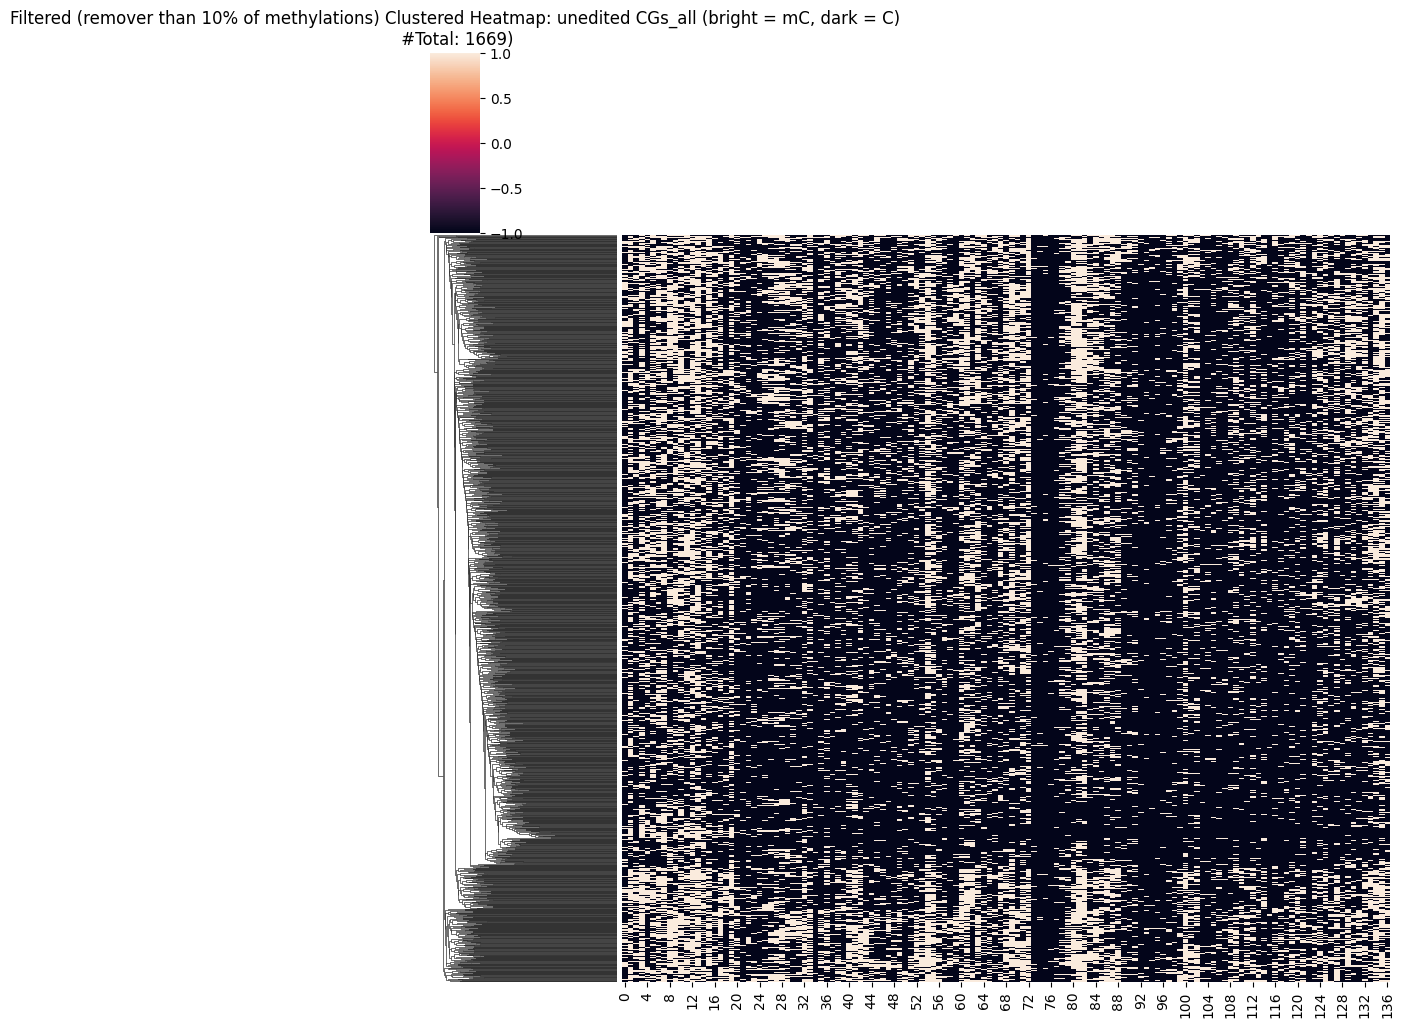

In [13]:
# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_silenced_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Filtered (remover than 10% of methylations) Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_silenced_filtered.shape[0]})")
plt.show()

In [60]:

def get_fractions(CGs_pd):
    CGs_sums = np.nansum(CGs_pd, axis=0) 
    CGs_fracs = CGs_sums  / len(CGs_pd) 
    return CGs_fracs

CGs_all_silenced_filtered_fracs = get_fractions(CGs_all_silenced_filtered)
CGs_all_silenced_filtered_fracs.shape

(137,)

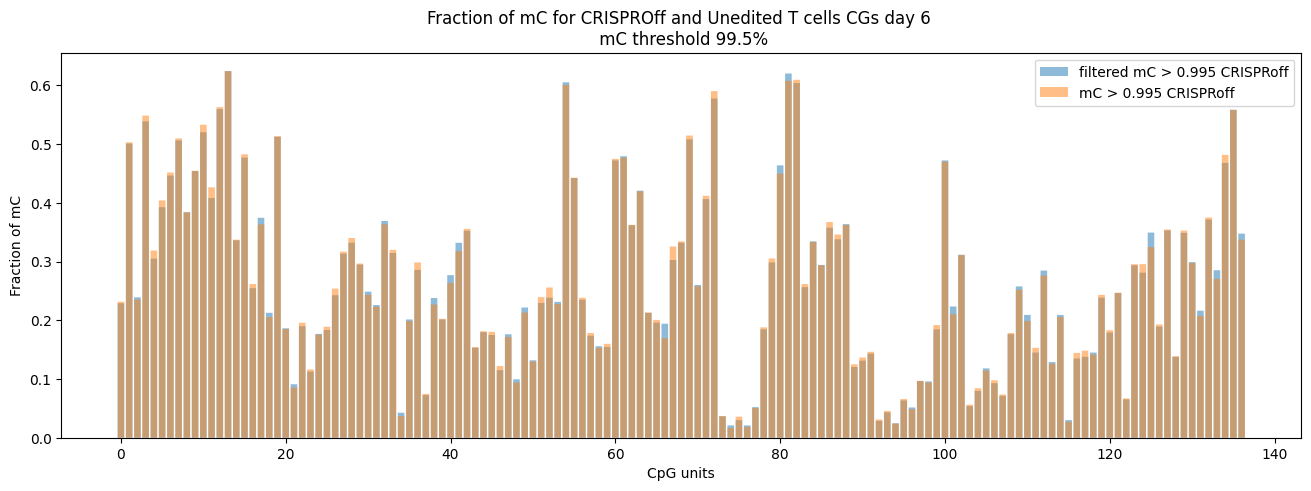

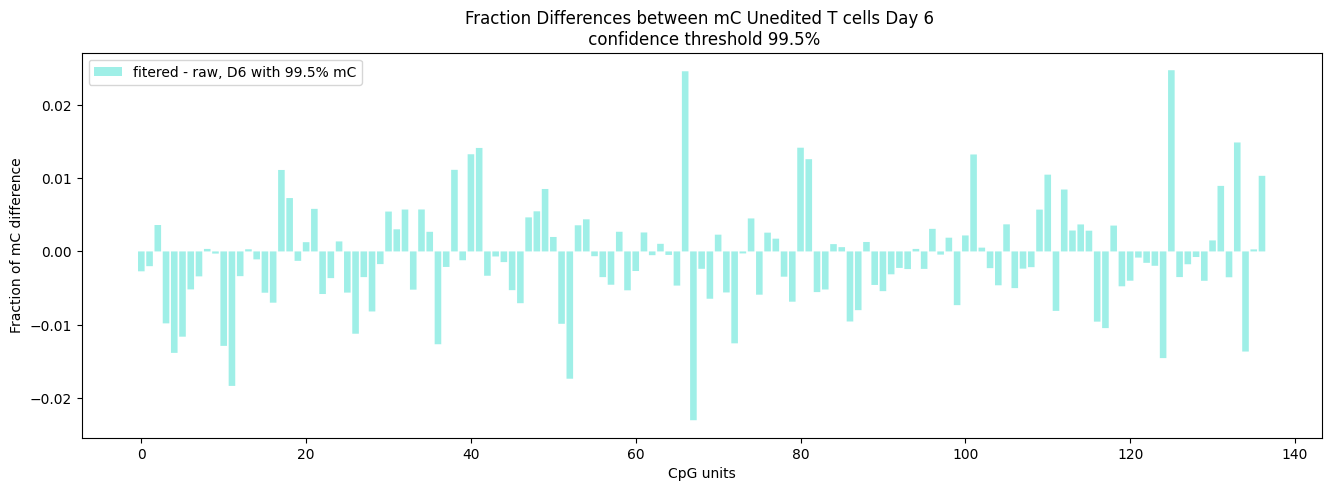

In [67]:

def get_fractions(CGs_pd):
    CGs_sums = np.nansum(CGs_pd, axis=0) 
    CGs_fracs = CGs_sums  / len(CGs_pd) 
    return CGs_fracs

CGs_all_silenced_filtered_fracs = get_fractions(CGs_all_silenced_filtered)
CGs_all_silenced_filtered_fracs.shape
CGs_all_silenced_fracs = get_fractions(CGs_all_silenced)
CGs_all_silenced_fracs.shape

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_all_silenced_filtered_fracs)), CGs_all_silenced_filtered_fracs, snap=False, alpha=0.5, label='filtered mC > 0.995 CRISPRoff')#, color='deepskyblue')
plt.bar(np.arange(len(CGs_all_silenced_fracs)), CGs_all_silenced_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff')# , color='deepskyblue')
# plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs day 6 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995_filtered =   CGs_all_silenced_filtered_fracs  - CGs_all_silenced_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_filtered)), dif_D6_mCthresh_995_filtered, snap=False, alpha=0.5, label='fitered - raw, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

In [69]:
valid_counts, methyl_counts

(array([10, 14, 20, ...,  5,  7,  7]), array([10, 14, 20, ...,  5,  7,  7]))

In [70]:
CGs_all_silenced = CGs_all_silenced_filtered.copy()
CGs_all_silenced, CGs_all_silenced.shape

(array([[ 1.,  1., nan, ...,  1., nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan],
        ...,
        [ 1.,  1., nan, ..., nan, nan,  1.],
        [nan,  1., nan, ..., nan, nan, nan],
        [nan, nan, nan, ..., nan, nan, nan]]),
 (1669, 137))

# Unedited cells

In [71]:
CGs_all_unedited = CGs_D6_unedited_mc0995.copy()
CGs_all_unedited.shape, CGs_all_unedited

((1127, 137),
 array([[ 1., nan, nan, ...,  1., nan, nan],
        [nan,  1.,  1., ...,  1.,  1., nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        ...,
        [nan, nan, nan, ...,  1.,  1.,  1.],
        [nan, nan, nan, ...,  1.,  1., nan],
        [nan, nan, nan, ...,  1., nan, nan]]))

In [72]:
# CGs_all_unedited = np.load("/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_6/unedited/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day6_unedited_Tcells_Thr0.995_NoFullyUnmethylated_T2Tv2_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-10_units_combined_numFWD357_numRVS496.npy")
    # "/home/michalula/code/epiCausality/epiCode/analyze_ont_data/T2T_v2.0_mapped/T_cells/day_28/unedited/analyze_single_reads/dimelo_v2_output/CG_137_padded_reads_day28_CRoff_Tcells_mC0.995_T2Tv2_NoFullyUnmeth_ovrlap0.9_mismat0.7_mapQ60_avgBaseQ20_mCthresh0.995_t2t_v2_0_chr1:206583354-206589854_2025-09-13_units_combined_numFWD6_numRVS16.npy")
    # "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")

# 142 CpG units: - 7KBps region:
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_142_units_combined_unedited_T_primerES_nCATS_numFWD1940_numRVS1599_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206583000-206590000_2025-02-04.npy")


# 106 CpG units:
# Threshold 0.9 =  /home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_106_units_combined_unedited_T_primerES_nCATS_numFWD1760_numRVS1398_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206584662-206587693_2025-02-04.npy

# 16 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1345_numRVS949_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")
# Threshold 0.9 =    "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_16_units_combined_unedited_T_primerES_nCATS_numFWD1058_numRVS795_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586012-206586343_2025-02-04.npy")

# 12 CpG units:
# Threshold 0.7 = "/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD1180_numRVS746_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")
# Threshold 0.9 = ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_12_units_combined_unedited_T_primerES_nCATS_numFWD881_numRVS598_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586112-206586243_2025-02-04.npy")

# ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

# Unedited T cells nCATS:
# Threshold 0.7 =  ("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD1081_numRVS662_padded_reads_unedited_T_primerES_nCATS_mCthresh0.7_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")
# Threshold 0.9 =("/home/michalula/code/epiCausality/epiCode/dimelo_v2_output/CG_combined_unedited_T_primerES_nCATS_numFWD788_numRVS516_padded_reads_unedited_T_primerES_nCATS_mCthresh0.9_t2t_v1_1_chr1:206586162-206586192_2025-02-03.npy")

# CGs_all_unedited, CGs_all_unedited.shape

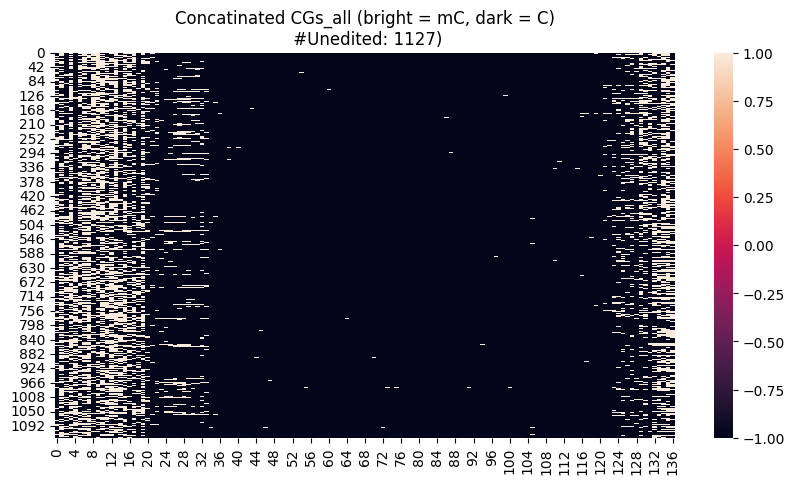

In [73]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_unedited).fillna(-1))
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Unedited: {CGs_all_unedited.shape[0]})")
plt.show()


<Figure size 1000x500 with 0 Axes>

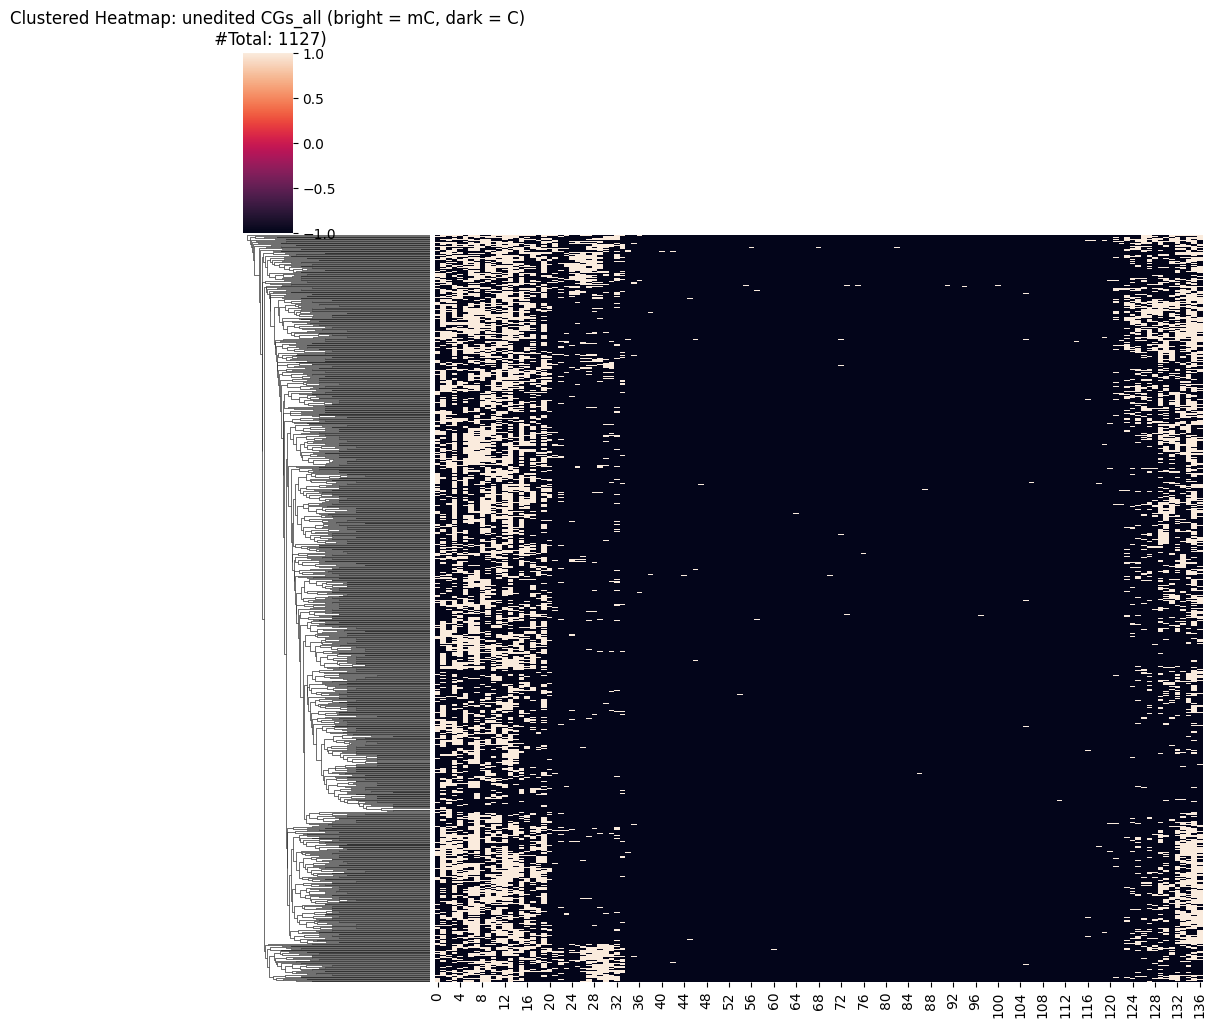

In [74]:
# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_unedited).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited.shape[0]})")
plt.show()

# Remove LOWest fraction of methylation reads

Total reads before filtering: 1127
Reads with zero covered CpGs: 0
Removed 95 reads <= 5.0% methylation (among covered CpGs).
Total reads after filtering: 1032


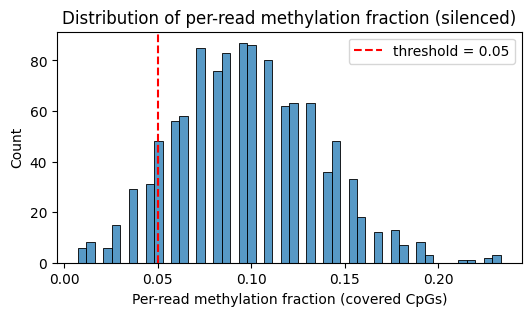

<Figure size 1000x500 with 0 Axes>

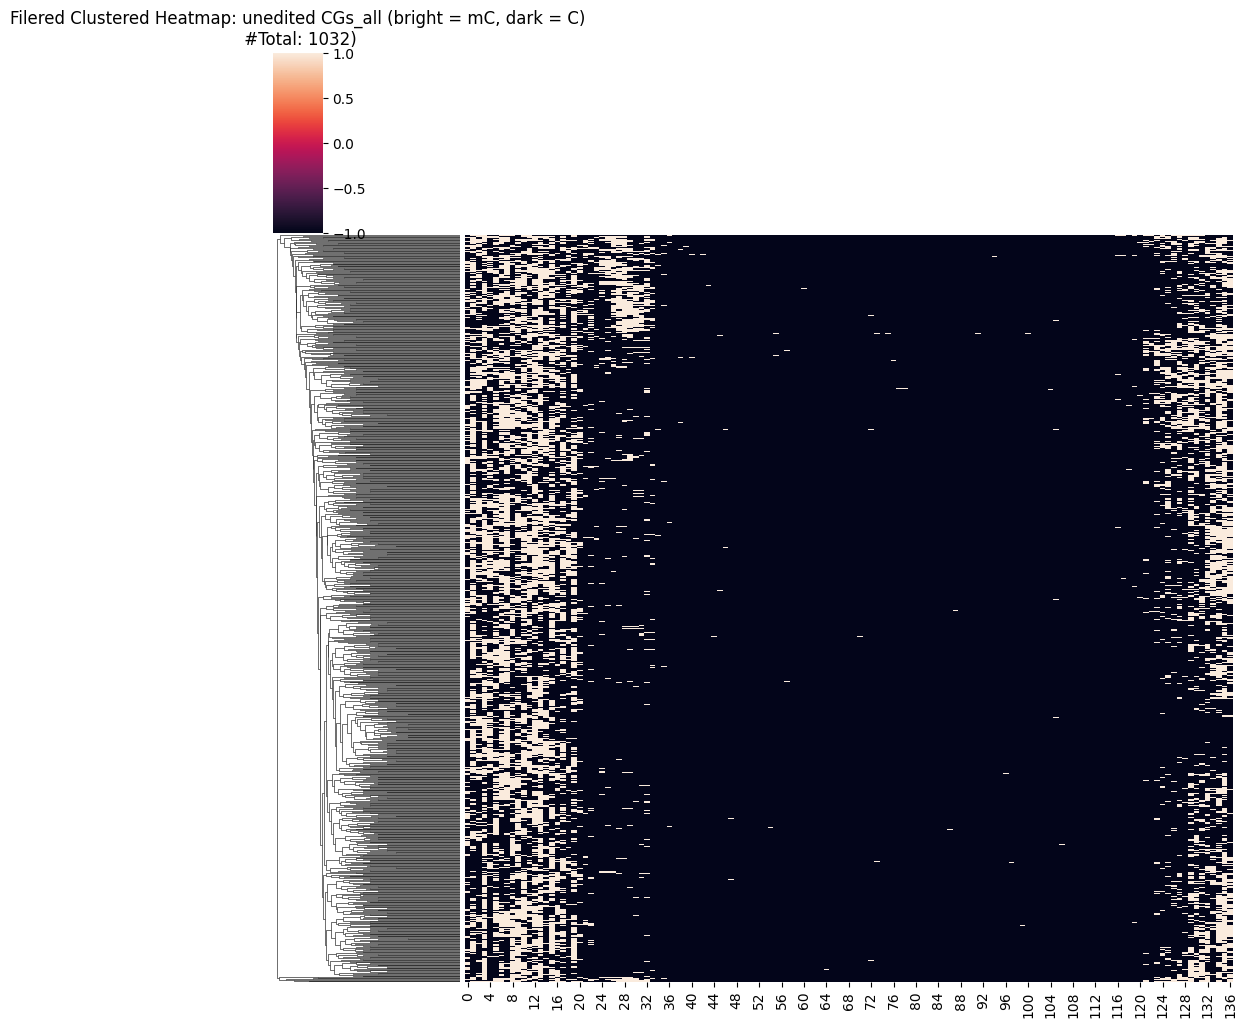

In [75]:
# Remove the Reads (raws) that have very low methylation sum    

# Filter out reads with very low methylation fraction (among covered CpGs)
low_methyl_frac_thresh = 0.05  # keep reads with > 10% methylated CpGs among covered positions

# Count covered CpGs per read and methylated CpGs per read
valid_counts = np.sum(~np.isnan(CGs_all_unedited), axis=1)
methyl_counts = np.nansum(CGs_all_unedited == 1, axis=1)

# Per-read methylation fraction (handle reads with zero covered CpGs)
# per_read_frac = np.where(valid_counts > 0, methyl_counts / valid_counts, 0.0)
total_num_CGs = CGs_all_unedited.shape[1]
per_read_frac = np.where(valid_counts > 0, methyl_counts /  total_num_CGs, 0.0)

print(f"Total reads before filtering: {CGs_all_unedited.shape[0]}")
print(f"Reads with zero covered CpGs: {(valid_counts == 0).sum()}")

# Create mask and filter
mask = per_read_frac > low_methyl_frac_thresh
CGs_all_unedited_filtered = CGs_all_unedited[mask]
num_removed = (~mask).sum()

print(f"Removed {num_removed} reads <= {low_methyl_frac_thresh*100:.1f}% methylation (among covered CpGs).")
print(f"Total reads after filtering: {CGs_all_unedited_filtered.shape[0]}")

# Quick inspect distribution of per-read methylation fractions
plt.figure(figsize=(6, 3))
sns.histplot(per_read_frac, bins=50, color='C0')
plt.axvline(low_methyl_frac_thresh, color='red', linestyle='--', label=f"threshold = {low_methyl_frac_thresh}")
plt.xlabel('Per-read methylation fraction (covered CpGs)')
plt.title('Distribution of per-read methylation fraction (silenced)')
plt.legend()
plt.show()

# plot clustered map of CGs_all_unedited 
plt.figure(figsize=(10, 5))
sns.clustermap(pd.DataFrame(CGs_all_unedited_filtered).fillna(-1),col_cluster=False, yticklabels=False)#, cmap='viridis')
plt.title(f"Filered Clustered Heatmap: unedited CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_unedited_filtered.shape[0]})")
plt.show()

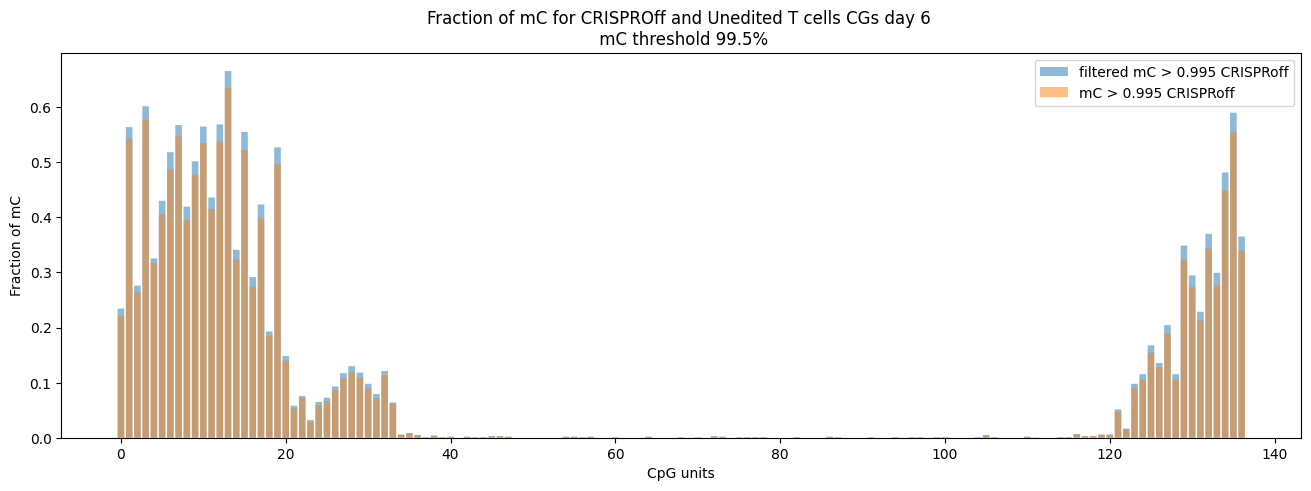

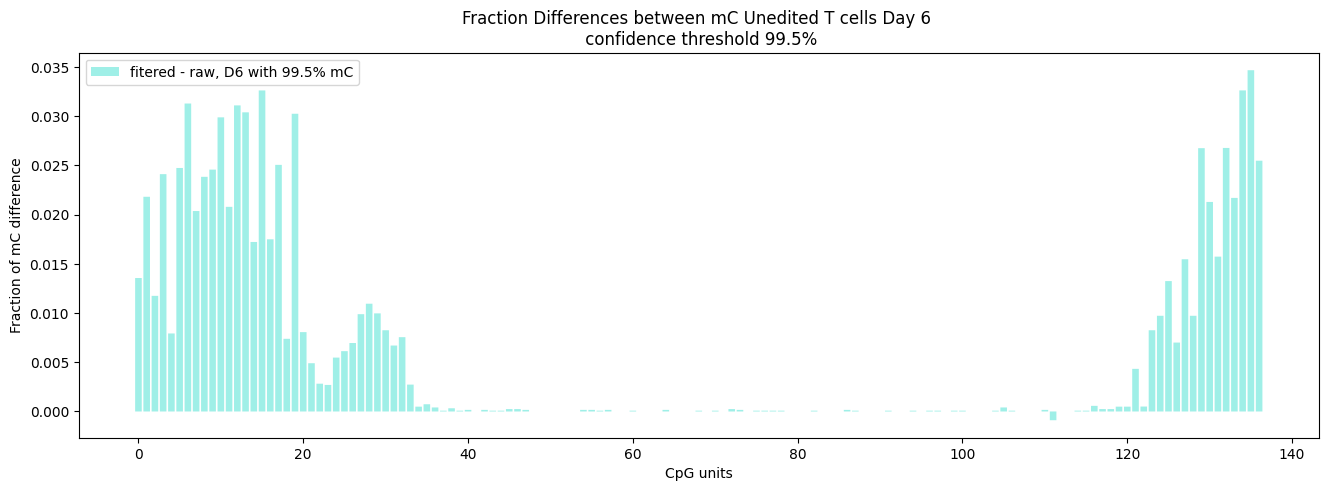

In [76]:

def get_fractions(CGs_pd):
    CGs_sums = np.nansum(CGs_pd, axis=0) 
    CGs_fracs = CGs_sums  / len(CGs_pd) 
    return CGs_fracs

CGs_all_unedited_filtered_fracs = get_fractions(CGs_all_unedited_filtered)
CGs_all_silenced_filtered_fracs.shape
CGs_all_unedited_fracs = get_fractions(CGs_all_unedited)
CGs_all_unedited_fracs.shape

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_all_unedited_filtered_fracs)), CGs_all_unedited_filtered_fracs, snap=False, alpha=0.5, label='filtered mC > 0.995 CRISPRoff')#, color='deepskyblue')
plt.bar(np.arange(len(CGs_all_unedited_fracs)), CGs_all_unedited_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff')# , color='deepskyblue')
# plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs day 6 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995_filtered =   CGs_all_unedited_filtered_fracs  - CGs_all_unedited_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_filtered)), dif_D6_mCthresh_995_filtered, snap=False, alpha=0.5, label='fitered - raw, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()

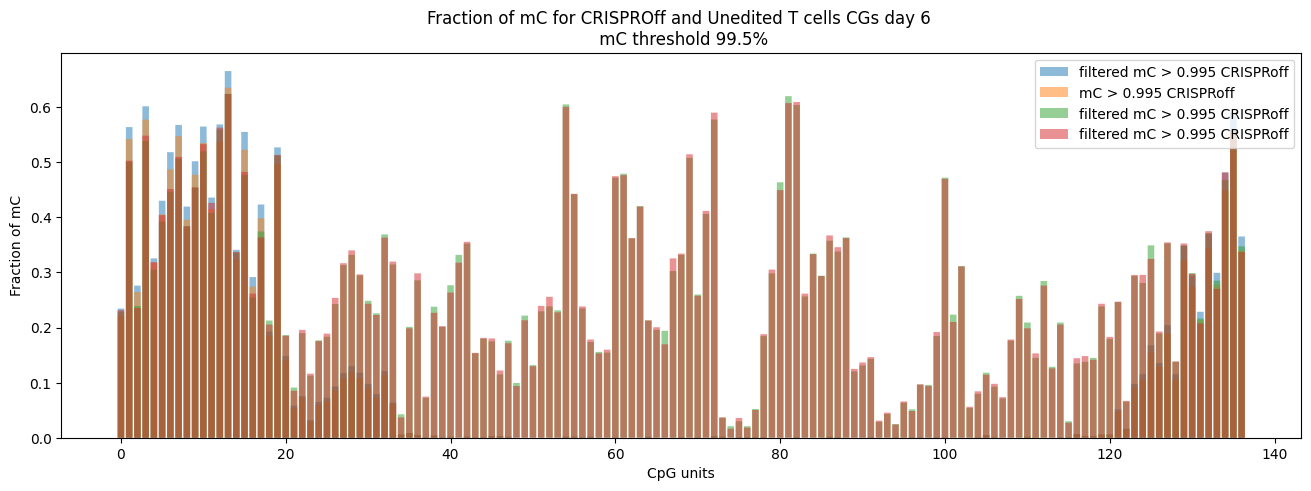

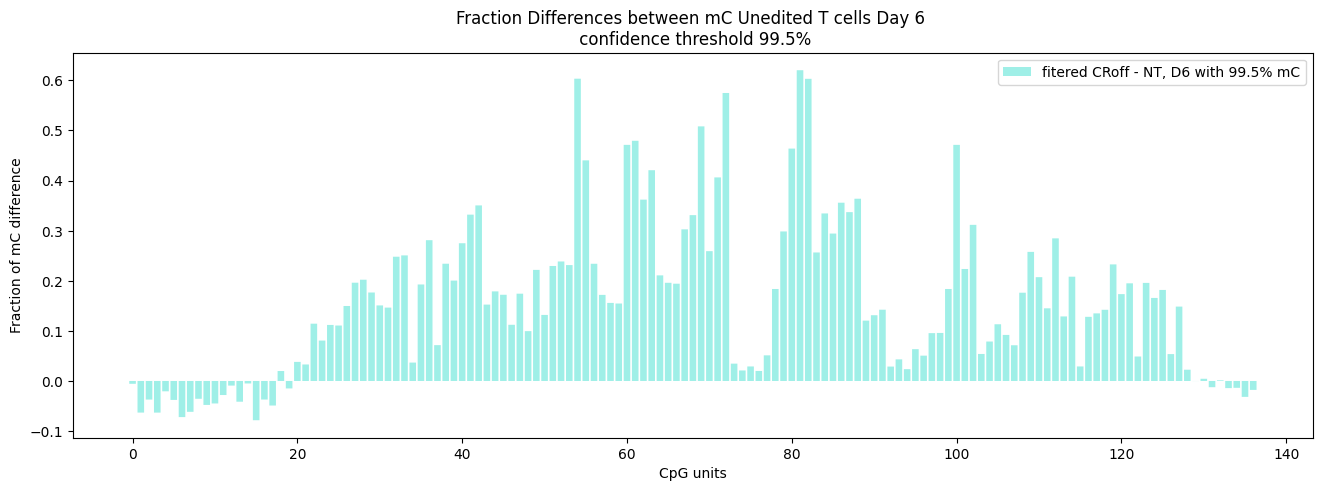

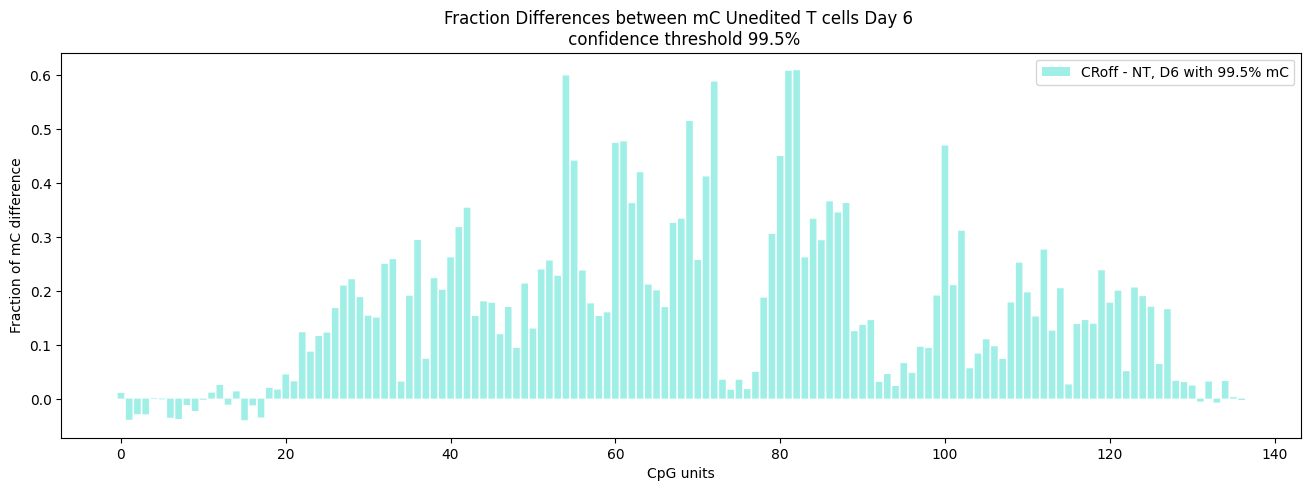

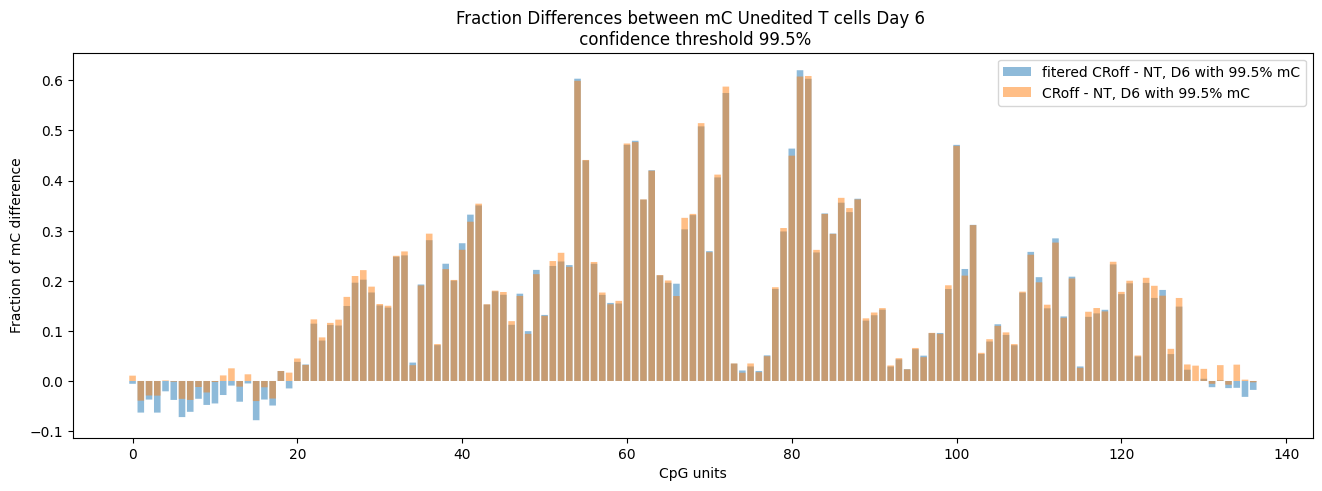

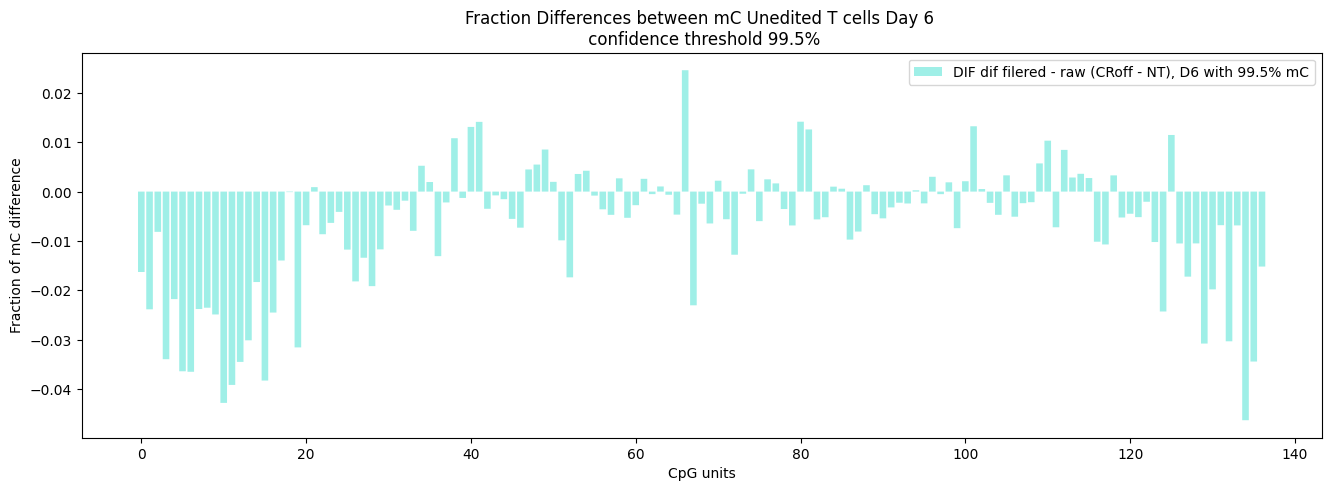

In [82]:

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(CGs_all_unedited_filtered_fracs)), CGs_all_unedited_filtered_fracs, snap=False, alpha=0.5, label='filtered mC > 0.995 CRISPRoff')#, color='deepskyblue')
plt.bar(np.arange(len(CGs_all_unedited_fracs)), CGs_all_unedited_fracs, snap=False, alpha=0.5, label='mC > 0.995 CRISPRoff')# , color='deepskyblue')

plt.bar(np.arange(len(CGs_all_silenced_filtered_fracs)), CGs_all_silenced_filtered_fracs, snap=False, alpha=0.5, label='filtered mC > 0.995 CRISPRoff')#, color='deepskyblue')
plt.bar(np.arange(len(CGs_all_silenced_fracs)), CGs_all_silenced_fracs, snap=False, alpha=0.5, label='filtered mC > 0.995 CRISPRoff')#, color='deepskyblue')
# plt.bar(np.arange(len(CGs_D6_unedited_mc0995_fracs)), CGs_D6_unedited_mc0995_fracs, snap=False, alpha=0.5, label='mC > 0.995 Unedited', color='navy')
# mediumblue.'turquoise', 'aquamarine', 'deepskyblue', 'dodgerblue', 'cornflowerblue', 'royalblue', 'blue', 'mediumblue', 'darkblue', 'navy', 'midnightblue'

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC')
plt.title('Fraction of mC for CRISPROff and Unedited T cells CGs day 6 \n mC threshold 99.5%')
plt.legend()
# Show the plot
plt.show()


# DIFFERENCES

dif_D6_mCthresh_995_filtered =     CGs_all_silenced_filtered_fracs - CGs_all_unedited_filtered_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_filtered)), dif_D6_mCthresh_995_filtered, snap=False, alpha=0.5, label='fitered CRoff - NT, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()


dif_D6_mCthresh_995=    CGs_all_silenced_fracs - CGs_all_unedited_fracs

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='CRoff - NT, D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()



plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_filtered)), dif_D6_mCthresh_995_filtered, snap=False, alpha=0.5, label='fitered CRoff - NT, D6 with 99.5% mC') #, color='turquoise'  )
plt.bar(np.arange(len(dif_D6_mCthresh_995)), dif_D6_mCthresh_995, snap=False, alpha=0.5, label='CRoff - NT, D6 with 99.5% mC') #, color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()


dif_D6_mCthresh_995_dif_dif =    dif_D6_mCthresh_995_filtered - dif_D6_mCthresh_995

plt.figure(figsize=(16, 5))
plt.bar(np.arange(len(dif_D6_mCthresh_995_dif_dif)), dif_D6_mCthresh_995_dif_dif, snap=False, alpha=0.5, label='DIF dif filered - raw (CRoff - NT), D6 with 99.5% mC', color='turquoise'  )

# Add labels and title
plt.xlabel('CpG units')
plt.ylabel('Fraction of mC difference')
plt.title('Fraction Differences between mC Unedited T cells Day 6 \n confidence threshold 99.5%')
plt.legend()

# Show the plot
plt.show()



In [22]:
CGs_all_unedited = CGs_all_unedited_filtered.copy()
CGs_all_unedited, CGs_all_unedited.shape

(array([[ 1., nan, nan, ...,  1., nan, nan],
        [nan,  1.,  1., ...,  1.,  1., nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        ...,
        [nan,  1., nan, ..., nan, nan, nan],
        [nan, nan, nan, ...,  1.,  1., nan],
        [nan, nan, nan, ...,  1., nan, nan]]),
 (1032, 137))

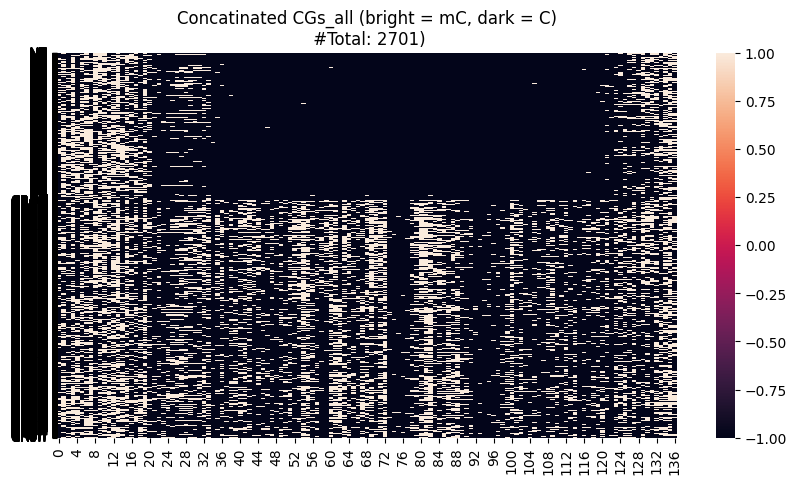

In [23]:
# plot clustering of CGs_all_unedited and CGs_all_silenced
CGs_all_combined = np.vstack((CGs_all_unedited, CGs_all_silenced))
CGs_all_combined.shape  # (1621, 137)       
# labels = np.array(['Unedited'] * CGs_all_unedited.shape[0] + ['Silenced'] * CGs_all_silenced.shape[0])
labels = np.array(['NT'] * CGs_all_unedited.shape[0] + ['CRoff'] * CGs_all_silenced.shape[0])
labels.shape  # (1621,)             
labels          
# Heatmap of CGs_all_combined
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(CGs_all_combined).fillna(-1), yticklabels=labels)                                          
plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Total: {CGs_all_combined.shape[0]})")
plt.show()


In [24]:
# # plot X_unedited_silenced 
# CGs_all_unedited_cut = pd.DataFrame(CGs_all_unedited[:-400])

# # Heatmap of CGs_all
# plt.figure(figsize=(10, 5))
# sns.heatmap(CGs_all_unedited_cut.fillna(-1))
# plt.title(f"Concatinated CGs_all (bright = mC, dark = C)\n #Silenced: {CGs_all_unedited_cut.shape[0]})")
# plt.show()


# Keep same amount of reads per condition

In [25]:
# CGs_all_unedited = np.array(CGs_all_unedited_cut)
# CGs_all_unedited, CGs_all_unedited.shape

In [26]:
if CGs_all_silenced.shape[0] > CGs_all_unedited.shape[0]:
    print("Silenced has more reads than unedited")
    # Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
    num_rows = CGs_all_silenced.shape[0]  # Total number of rows
    subset_size = CGs_all_unedited.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
    print('subset_size = ', subset_size)

    # Randomly select row indices
    random_indices = np.random.choice(num_rows, subset_size, replace=False)

    # Get the subset
    subset = CGs_all_silenced[random_indices]

    # Display the shape to confirm
    print(subset.shape)  # Should be (subset_size, 10)

    CGs_all_silenced = subset
    CGs_all_silenced

else:
    print("Unedited has more reads than silenced")
    # Assuming CGs_all_silenced is your NumPy array of shape (6657, 10)
    num_rows = CGs_all_unedited.shape[0]  # Total number of rows
    subset_size = CGs_all_silenced.shape[0] # 1743 # 1304  # Define how many rows you want to randomly select
    print('subset_size = ', subset_size)

    # Randomly select row indices
    random_indices = np.random.choice(num_rows, subset_size, replace=False)

    # Get the subset
    subset = CGs_all_unedited[random_indices]

    # Display the shape to confirm
    print(subset.shape)  # Should be (subset_size, 10)

    CGs_all_unedited = subset
    CGs_all_unedited


print("Final shapes after balancing:")
print(CGs_all_silenced.shape[0], CGs_all_unedited.shape[0])

Silenced has more reads than unedited
subset_size =  1032
(1032, 137)
Final shapes after balancing:
1032 1032


In [27]:
CGs_all_silenced

array([[ 1., nan, nan, ..., nan,  1., nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ...,  1., nan, nan],
       ...,
       [nan,  1.,  1., ..., nan, nan,  1.],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan,  1.,  1., ...,  1.,  1.,  1.]])

In [28]:
# Undetided T cells nCATS get lable 0 as CD55 is lowly expressed in silened T cells (~90% of cells should be silenced)
y_silenced = np.array([0] * CGs_all_silenced.shape[0])
y_silenced, y_silenced.shape

(array([0, 0, 0, ..., 0, 0, 0]), (1032,))

In [29]:
# Undetided T cells nCATS get lable 1 as CD55 is highly expressed in undetided T cells
y_unedited = np.array([1] * CGs_all_unedited.shape[0])
y_unedited, y_unedited.shape

(array([1, 1, 1, ..., 1, 1, 1]), (1032,))

In [30]:
CGs_all_unedited.shape, CGs_all_silenced.shape

((1032, 137), (1032, 137))

In [31]:
X_unedited_silenced = np.concatenate((CGs_all_unedited, CGs_all_silenced), axis=0)
X_unedited_silenced, X_unedited_silenced.shape

(array([[ 1., nan, nan, ...,  1., nan, nan],
        [nan,  1.,  1., ...,  1.,  1., nan],
        [nan,  1., nan, ...,  1.,  1., nan],
        ...,
        [nan,  1.,  1., ..., nan, nan,  1.],
        [nan, nan, nan, ..., nan, nan, nan],
        [nan,  1.,  1., ...,  1.,  1.,  1.]]),
 (2064, 137))

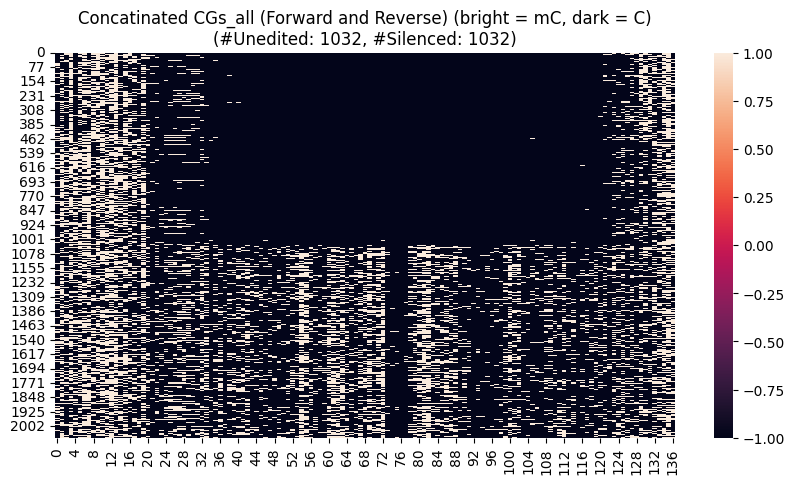

In [32]:
# plot X_unedited_silenced 

# Heatmap of CGs_all
plt.figure(figsize=(10, 5))
sns.heatmap(pd.DataFrame(X_unedited_silenced).fillna(-1))
plt.title(f"Concatinated CGs_all (Forward and Reverse) (bright = mC, dark = C)\n(#Unedited: {CGs_all_unedited.shape[0]}, #Silenced: {CGs_all_silenced.shape[0]})")
plt.show()


In [33]:
y_unedited_silenced = np.concatenate((y_unedited, y_silenced), axis=0)
y_unedited_silenced, y_unedited_silenced.shape

(array([1, 1, 1, ..., 0, 0, 0]), (2064,))

In [34]:
train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16, shuffle=True)
train_idx, test_idx, len(train_idx), len(test_idx)

(array([1215,  745,   29, ...,  635, 1345,  581]),
 array([ 838,   26,  413,  508, 1227, 1258,  778, 1988, 1308, 1799,  776,
         532,  474,  236, 1306,  592, 1571, 2014, 1257, 1056, 2032,  445,
        1530, 1046,  447,   18,  461, 1174,  394, 1063, 1412,  475,  657,
        1861, 1229, 1218,  495, 1498, 1270,  917, 1589,  232, 1181,  220,
        1173, 1553,  654, 1209, 1167, 1698,  273,  960, 1180,  392,   20,
          30,  962,  624,   90, 1903, 1821, 1093, 1978,  938,  647, 1719,
        1288, 1346,   45, 1661,   35,  571,  884, 1490,  378,  782,   52,
        1550,   81,  493, 1337,  244, 1738,  975, 1995,  946, 1012, 1286,
        1332,  953, 1437, 1298, 1583, 2042, 1602, 1367, 1595,  906,  609,
        1198,  210,  561,  716,  431, 1953, 1492, 1136, 1608,  831,  871,
        1716,  566, 1631,  265, 1035,    7,  703,  954, 1451, 1390, 1074,
        1496, 1464, 1423, 1680,  996,  881, 1394, 1006, 1879, 1471,  941,
        1205,  863, 1777, 1718,  939, 1457, 1622, 1486, 1922,

In [35]:
X = pd.DataFrame(X_unedited_silenced).fillna(-1)
y = y_unedited_silenced

In [36]:
X.iloc[16:23,:]

,0,1,2,3,4,5,6,7,8,9,...,127,128,129,130,131,132,133,134,135,136
16,-1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0
17,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,...,1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0
18,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,...,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0
19,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,...,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
20,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,1.0,...,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,1.0,1.0,-1.0
21,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0
22,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,...,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0


In [37]:
X_train, X_test = X.iloc[train_idx, :], X.iloc[test_idx, :]
y_train, y_test = y[train_idx], y[test_idx]

In [38]:
def predict_reg(f, X, y):
    preds = f.predict(X)
    preds_round = np.round(preds) # / 50) # 100-->2; 50-->1; 0-->0
    # print('preds=', preds[:16])
    # print('preds_round', preds_round[:16])
    # print('np.mean(preds_round==y)*100 =', np.mean(preds_round==y)*100)
    # print('y', y[:16])
    # preds012 = np.round(preds / 50) # 100-->2; 50-->1; 0-->0
    # print('preds012', preds012[:16])
    # print('np.mean(preds012*50==y)*100 =', np.mean(preds012*50==y)*100)
    return np.mean(preds_round==y)*100

model = LinearRegression().fit(X_train,y_train)
print("GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = DecisionTreeRegressor().fit(X_train,y_train)
print("Tree: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = RandomForestRegressor().fit(X_train,y_train)
print("RF: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = GradientBoostingRegressor().fit(X_train,y_train)
print("GBM: {:.2f}%".format(predict_reg(model, X_test, y_test)))
print("####")
model = MLPRegressor(max_iter=1000,hidden_layer_sizes=(50,20)).fit(X_train, y_train)
print("NN: {:.2f}%".format(predict_reg(model, X_test, y_test)))

print("####")
model = LogisticRegression(max_iter=1000, penalty="l1", solver='saga').fit(X_train,y_train)
print("Sparse GLM: {:.2f}%".format(predict_reg(model, X_test, y_test)))

GLM: 95.16%
####
Tree: 96.51%
####
RF: 98.84%
####
GBM: 97.48%
####
NN: 96.90%
####
Sparse GLM: 98.45%


/home/michalula/miniconda3/envs/dimelo_v2_modkit_parsing/lib/python3.11/site-packages/sklearn/linear_model/_sag.py:349: ConvergenceWarning:

The max_iter was reached which means the coef_ did not converge



In [39]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_)), print(len(model.coef_[0]))

[[101  80  55  40  77  83  64  42  73  62  63  81  89  70 120  87  56  93
   37  27  52  85 128 137  61 126  50 110  12   5 129  43 121 133 116  26
  134  72  68  23 132  36 125 100   8  86 135   3  29  17 123 130  19 136
  113 103   9  16  32  18   1  33  14   6  11  13  21  60  51  49  54  53
   57  58  59  44  45  46  47  48  34  35  20  22   2  10   4   7  39  38
   41  76  79  71  67  65  96  95  94  92  90  91  84  88  82  69  66  74
   99  98 102  97 112 111 109 108 106 107 105 104  15  78  75  25  31  30
   24  28 127 124 122 114 115 117 118 119 131]]
[[0.05430502 0.         0.18051393 0.         0.37352852 0.02074389
  0.         0.22193211 0.1017116  0.         0.00872841 0.38924834
  0.00590579 0.02386057 0.         0.09605509 0.15125546 0.06781198
  0.12109861 0.         0.00308699 0.         0.27244254 0.
  0.         0.31802967 0.64507991 0.         0.15654183 0.
  0.         0.09268633 0.05312853 0.         0.         0.23870107
  0.65951629 0.         0.         1.52243

(None, None)

In [40]:
celltypes = ["unedited", "silenced"]
celltypes

['unedited', 'silenced']

In [41]:
# model.coef_

In [42]:
np.arange(1, 11)

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])

In [43]:
(model.coef_).shape[1]

137

In [44]:
X_axis = np.arange(1, model.coef_.shape[1]+1)  # +1 # np.arange(10)+1
X_axis

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137])

In [45]:
np.abs(model.coef_)

array([[0.05430502, 0.        , 0.18051393, 0.        , 0.37352852,
        0.02074389, 0.        , 0.22193211, 0.1017116 , 0.        ,
        0.00872841, 0.38924834, 0.00590579, 0.02386057, 0.        ,
        0.09605509, 0.15125546, 0.06781198, 0.12109861, 0.        ,
        0.00308699, 0.        , 0.27244254, 0.        , 0.        ,
        0.31802967, 0.64507991, 0.        , 0.15654183, 0.        ,
        0.        , 0.09268633, 0.05312853, 0.        , 0.        ,
        0.23870107, 0.65951629, 0.        , 0.        , 1.52243944,
        0.        , 1.25727273, 0.37032818, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.44752035,
        0.        , 0.61001544, 0.        , 0.        , 1.72203714,
        0.68294492, 0.        , 0.        , 0.        , 0.        ,
        0.48950436, 1.09340716, 1.05154598, 1.38695876, 0.        ,
        0.        , 0.        , 0.28512807, 0.        , 0.8795615 ,
        0.        , 0.28515434, 1.10610165, 0.  

/tmp/ipykernel_3620117/1522961784.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



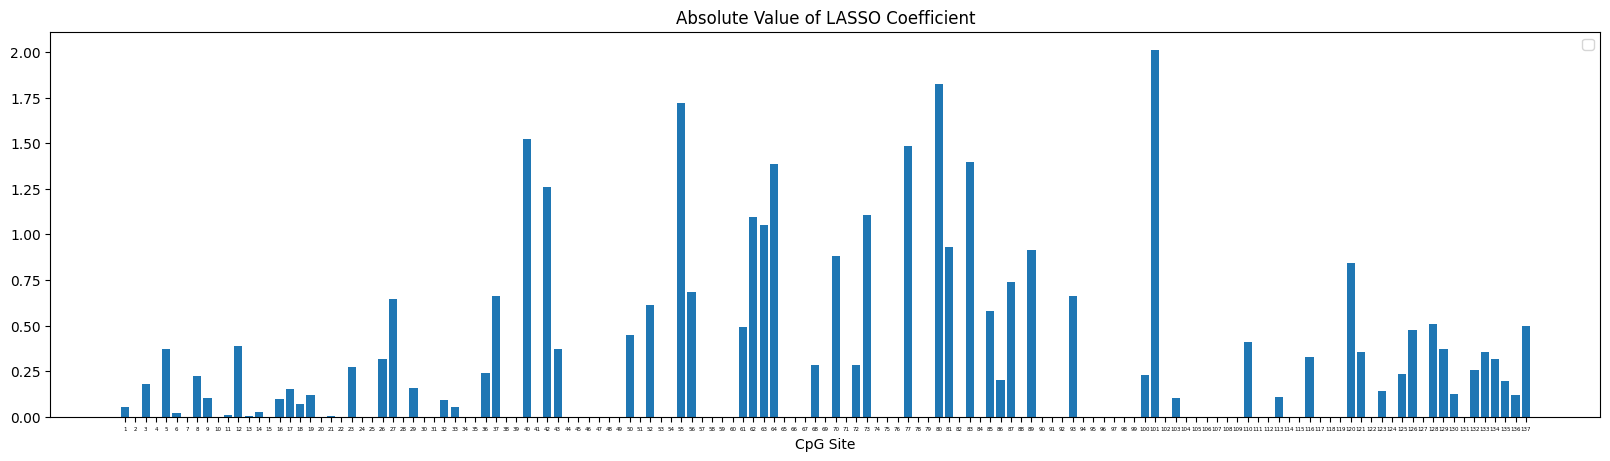

In [46]:
plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis, np.abs(model.coef_[0])) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=4)
plt.show()

lasso_abs_coefs.shape= (137,) [0.05430502 0.         0.18051393 0.         0.37352852 0.02074389
 0.         0.22193211 0.1017116  0.         0.00872841 0.38924834
 0.00590579 0.02386057 0.         0.09605509 0.15125546 0.06781198
 0.12109861 0.         0.00308699 0.         0.27244254 0.
 0.         0.31802967 0.64507991 0.         0.15654183 0.
 0.         0.09268633 0.05312853 0.         0.         0.23870107
 0.65951629 0.         0.         1.52243944 0.         1.25727273
 0.37032818 0.         0.         0.         0.         0.
 0.         0.44752035 0.         0.61001544 0.         0.
 1.72203714 0.68294492 0.         0.         0.         0.
 0.48950436 1.09340716 1.05154598 1.38695876 0.         0.
 0.         0.28512807 0.         0.8795615  0.         0.28515434
 1.10610165 0.         0.         0.         1.48684651 0.
 0.         1.82414571 0.92820439 0.         1.39713521 0.
 0.58238463 0.20081435 0.74141683 0.         0.91385649 0.
 0.         0.         0.66195885 0. 

/tmp/ipykernel_3620117/1495786018.py:14: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



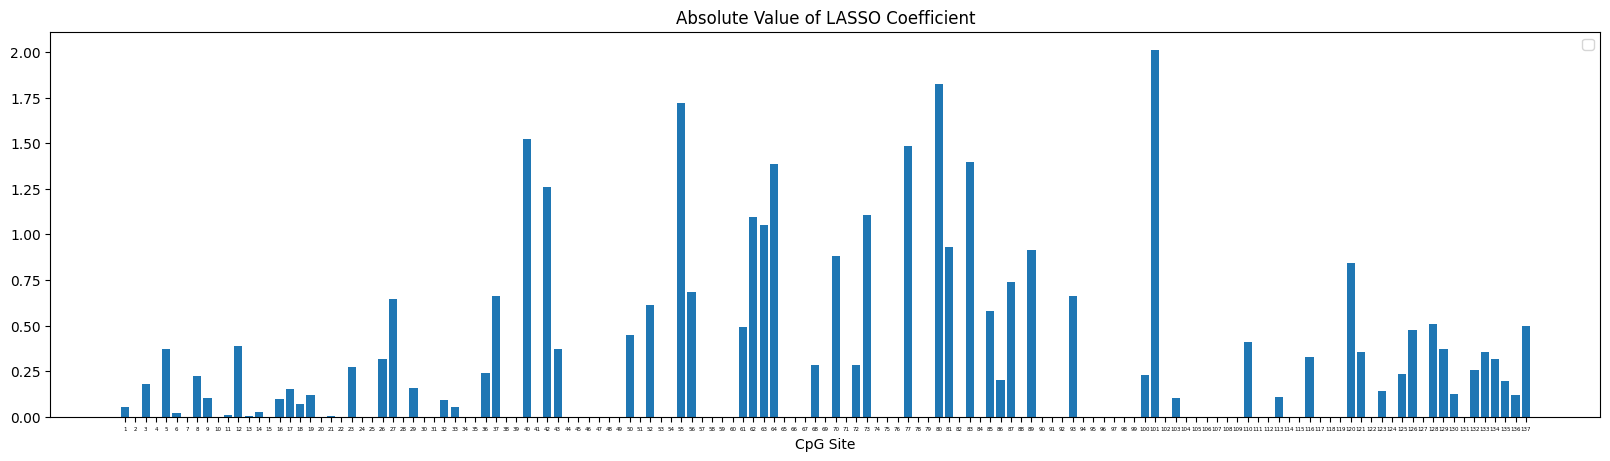

In [47]:
lasso_abs_coefs = np.abs(model.coef_[0])
print("lasso_abs_coefs.shape=",lasso_abs_coefs.shape, lasso_abs_coefs)

plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis,lasso_abs_coefs) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=4)
plt.show()

In [48]:
# Save lasso_abs_coefs with todays date
import datetime     
today = datetime.date.today()
print("Today's date:", today)
save_name="lasso_abs_coefs_silenced_unedited_Tcells_day6_mCthresh0.9"+str(today)+".npy"

np.save(save_name, lasso_abs_coefs)

Today's date: 2025-10-14


/tmp/ipykernel_3620117/485716090.py:11: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



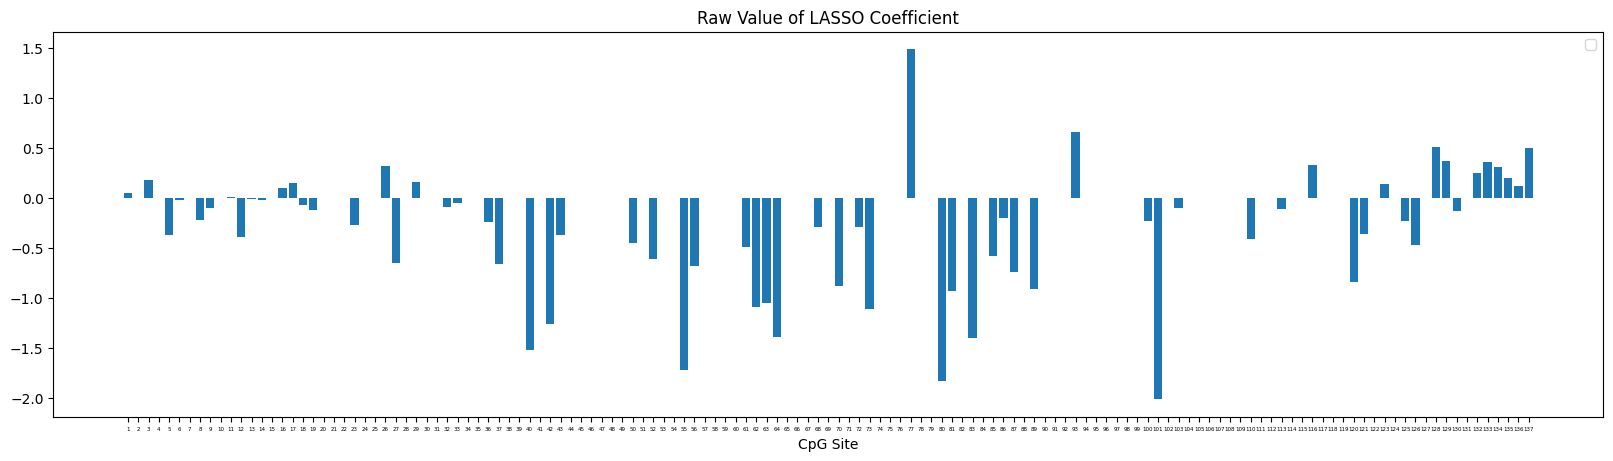

In [49]:
plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size

X_axis =  np.arange(1, model.coef_.shape[1]+1) # +1 # np.arange(10)+1
shifts = [-.4,-.15] #,.1]

# for i in range(1,2):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i]) 
    
plt.bar(X_axis, model.coef_[0]) #, .25) #  model.coef_) # np.abs(model.coef_)), .25) # ,label=celltypes[i])

plt.legend()
plt.title("Raw Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=4)
plt.show()

In [50]:
def print_accuracy(f):
    print(f"Accuracy = {100 * np.sum(f(X_test) == y_test) / len(y_test)}%")
    time.sleep(0.5)  # to let the print get out before any progress bars


shap.initjs()

In [51]:
# # K-nearest neighbors
# knn = sklearn.neighbors.KNeighborsClassifier()
# knn.fit(X_train, y_train)

# print_accuracy(knn.predict)
# Accuracy = 96.66666666666667 # %
# # Explain a single prediction from the test set
# explainer = shap.KernelExplainer(knn.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test.iloc[0, :])
# shap.force_plot(explainer.expected_value[0], shap_values[:, 0], X_test.iloc[0, :])

# # Using 120 background data samples could cause slower run times. Consider using shap.sample(data, K) or shap.kmeans(data, K) to summarize the background as K samples.
# # Explain all the predictions in the test set
# shap_values = explainer.shap_values(X_test)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

# # sample order by similarity

# # f(x)
# # Support vector machine with a linear kernel
# svc_linear = sklearn.svm.SVC(kernel="linear", probability=True)
# svc_linear.fit(X_train, y_train)
# print_accuracy(svc_linear.predict)

# # explain all the predictions in the test set
# explainer = shap.KernelExplainer(svc_linear.predict_proba, X_train)
# shap_values = explainer.shap_values(X_test)
# # this is multiclass so we only visualize the contributions to first class (hence index 0)
# shap.force_plot(explainer.expected_value[0], shap_values[..., 0], X_test)

Text(0.5, 1.0, 'Global Abs SHAP Importances (test :100 data points)')

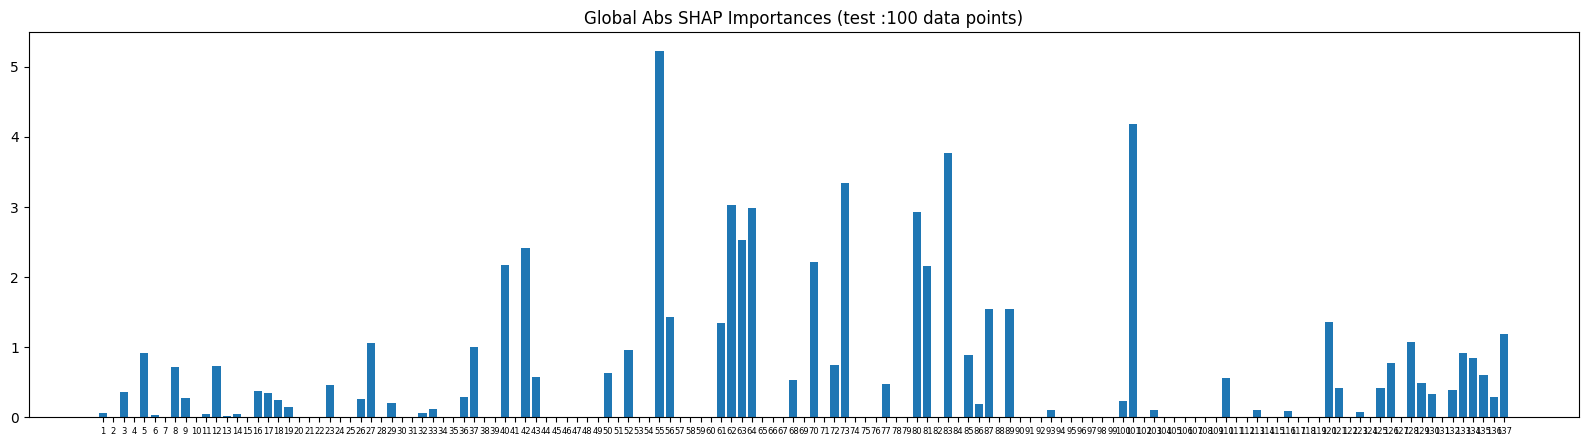

In [52]:
# import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test[:100])

plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=6)
plt.title("Global Abs SHAP Importances (test :100 data points)")

In [53]:
# import shap
# Xshap = shap.kmeans(X_train, 20)
explainer = shap.Explainer(model.predict, X) # shap.data)
shapvals = explainer(X_test)


PermutationExplainer explainer: 517it [00:10,  3.29it/s]                         


Text(0.5, 1.0, 'Global Abs SHAP Importances (test :100 data points)')

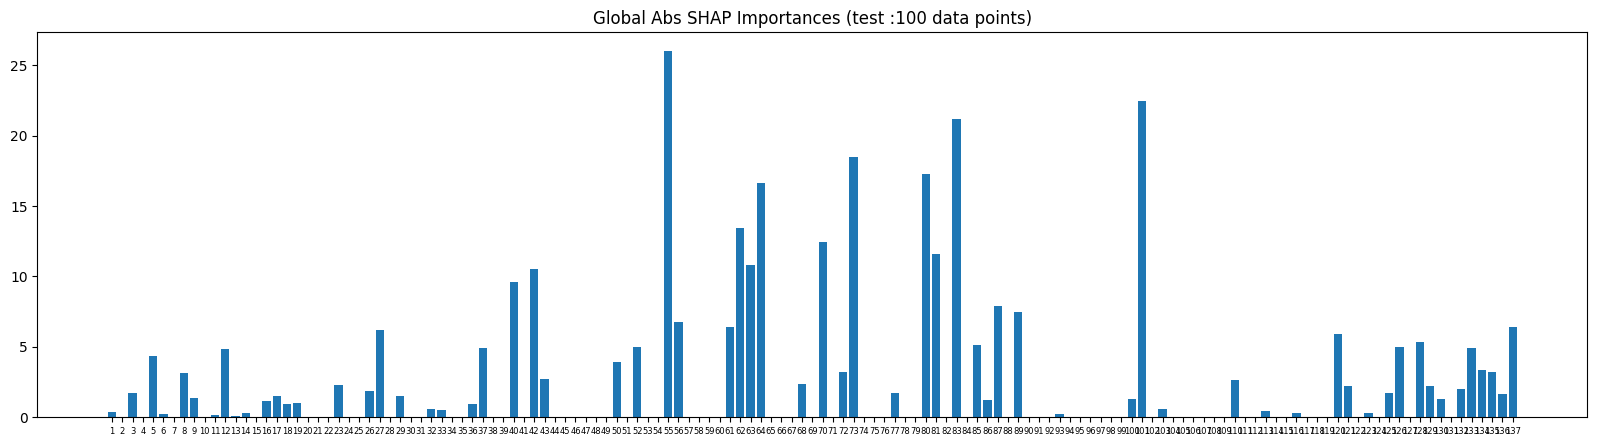

In [56]:

plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=6)
plt.title("Global Abs SHAP Importances (test :100 data points)")

Text(0.5, 1.0, 'Global Abs SHAP Importances on test set')

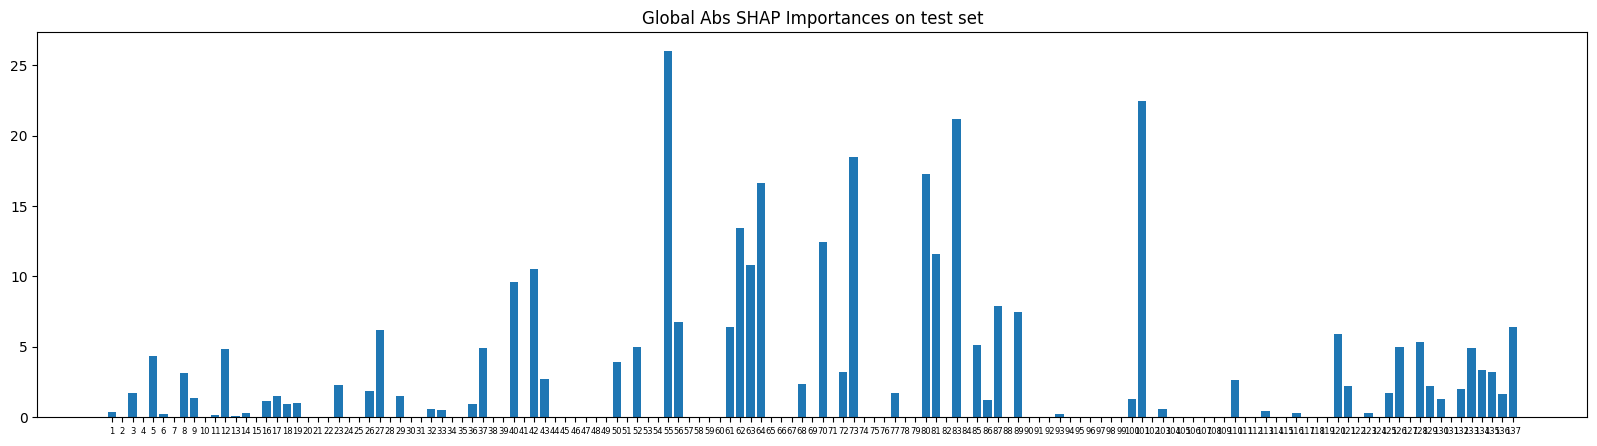

In [58]:
shap_sumabs_coefs = np.sum(np.abs(shapvals.values), axis=0)

plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
# sumabs = np.sum(np.abs(shapvals.values), axis=0)
plt.bar(X_axis, shap_sumabs_coefs)
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=6)
plt.title("Global Abs SHAP Importances on test set")

In [59]:

save_name="shap_sumabs_coefs_silenced_unedited_Tcells_day6_mCthresh0.9"+str(today)+".npy"

np.save(save_name, shap_sumabs_coefs)

Text(0.5, 1.0, 'Global SHAP Importances')

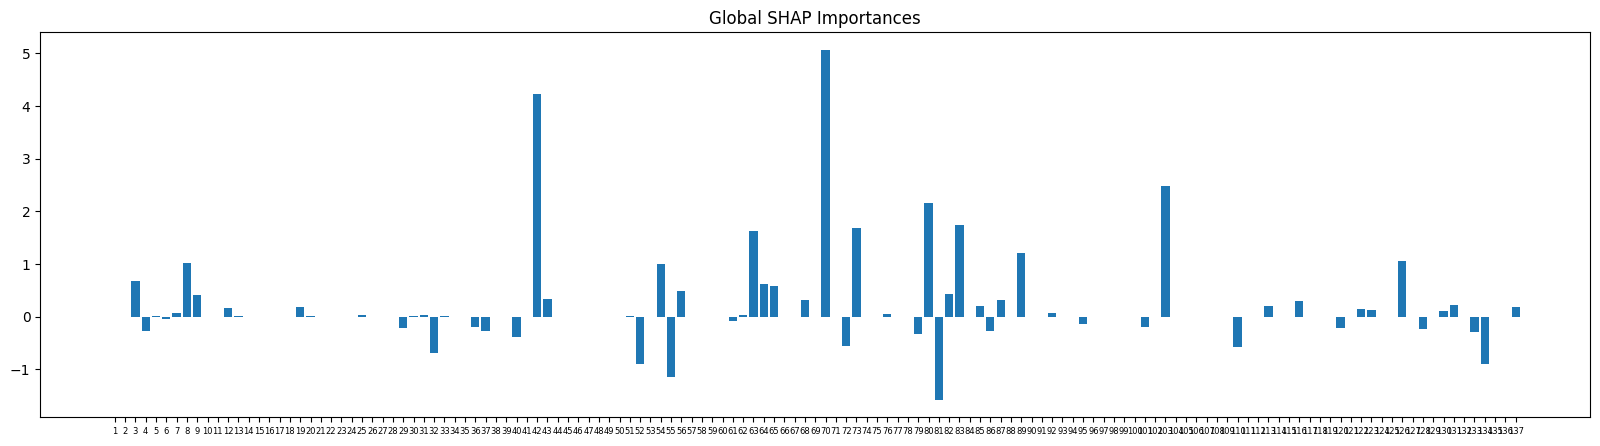

In [103]:
plt.figure(figsize=(20, 5))  # <-- Correct way to set figure size
sumabs = np.sum(shapvals.values, axis=0)
plt.bar(X_axis, sumabs)
plt.xticks(X_axis)
plt.xticks(X_axis, fontsize=6)
plt.title("Global SHAP Importances")

# Add a 1D CNN model + interpret

In [54]:
# # Add a 1D CNN model + interpret
# import numpy as np
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.utils import shuffle
# from sklearn.inspection import permutation_importance

# # # Create dummy data
# # x_train = np.random.rand(1000, 10, 1)
# # y_train = np.random.rand(1000) * 100

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=x_train.shape), #(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile and train the model
# model.compile(optimizer='adam', loss='mse')
# model.fit(x_train, y_train, epochs=10, batch_size=32)

# # Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # To fix the error, change the score_func
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

# # Create a copy of x_train reshaped for scoring
# x_train_reshaped = x_train.reshape((1000, 10))

# # Calculate permutation importance
# results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)

# # Output feature importance
# importance = results.importances_mean
# for i, imp in enumerate(importance):
#     print(f"Feature {i+1} importance: {imp}")

To enhance the provided code with a test set and plotting of evaluation metrics, specifically the mean squared error (MSE) on both training and test datasets, you can follow these steps. I'll use Matplotlib for plotting.


In [55]:

# import numpy as np
# import matplotlib.pyplot as plt
# from keras.models import Sequential
# from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense
# from sklearn.model_selection import train_test_split

# # Create dummy data
# x = np.random.rand(1200, 10, 1)
# y = np.random.rand(1200) * 100

# # Split the data into training and test sets
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Build the 1D CNN model
# model = Sequential([
#     Conv1D(32, kernel_size=3, activation='relu', input_shape=(10, 1)),
#     MaxPooling1D(pool_size=2),
#     Flatten(),
#     Dense(100, activation='relu'),
#     Dense(1)
# ])

# # Compile the model
# model.compile(optimizer='adam', loss='mse')

# # Train the model and save history
# history = model.fit(x_train, y_train, epochs=10, batch_size=32, validation_data=(x_test, y_test))

# # Plot the training and validation loss
# plt.plot(history.history['loss'], label='Train MSE')
# plt.plot(history.history['val_loss'], label='Test MSE')
# plt.title('Model MSE')
# plt.ylabel('Mean Squared Error')
# plt.xlabel('Epoch')
# plt.legend(loc='upper right')
# plt.show()

In [56]:
# Evaluate feature importance
# def score_func(X, y):
#     pred = model.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))
# # To fix the error, change the score_func:
# def score_func(estimator, X, y):
#     pred = estimator.predict(X)
#     return np.mean(np.abs(y - pred.flatten()))

def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# # # Create a copy of x_train reshaped for scoring
# X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))

# # Calculate permutation importance
# results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
# Use X_train directly without reshaping
results = permutation_importance(model, np.asarray(X_train), np.asarray(y_train), scoring=score_func)


# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")

Feature 1 importance: 0.0
Feature 2 importance: 0.0
Feature 3 importance: -0.0002583979328165377
Feature 4 importance: 0.00038759689922480603
Feature 5 importance: 0.0
Feature 6 importance: -0.00012919896640826902
Feature 7 importance: 0.0
Feature 8 importance: -0.0007751937984496129
Feature 9 importance: 0.0
Feature 10 importance: 0.0
Feature 11 importance: 0.0
Feature 12 importance: 0.0
Feature 13 importance: 0.0
Feature 14 importance: 0.0
Feature 15 importance: 0.0
Feature 16 importance: 0.0
Feature 17 importance: 0.0
Feature 18 importance: 0.0
Feature 19 importance: 0.00012919896640826867
Feature 20 importance: 0.0
Feature 21 importance: 0.0
Feature 22 importance: 0.0
Feature 23 importance: 0.0
Feature 24 importance: 0.0
Feature 25 importance: 0.0
Feature 26 importance: 0.0
Feature 27 importance: 0.0
Feature 28 importance: 0.0
Feature 29 importance: 0.00012919896640826867
Feature 30 importance: 0.0
Feature 31 importance: 0.0
Feature 32 importance: -0.0007751937984496127
Feature 33 

In [57]:
import numpy as np
from sklearn.inspection import permutation_importance

# Ensure X_train is a NumPy array
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

# Define scoring function
def score_func(estimator, X, y):
    pred = estimator.predict(X)
    return np.mean(np.abs(y - pred.flatten()))

# Check shape before calling permutation_importance
print("X_train shape:", X_train.shape)

# Calculate permutation importance
results = permutation_importance(model, X_train, y_train, scoring=score_func)

# Output feature importance
importance = results.importances_mean
for i, imp in enumerate(importance):
    print(f"Feature {i+1} importance: {imp}")


X_train shape: (1548, 137)
Feature 1 importance: 0.0
Feature 2 importance: 0.0
Feature 3 importance: -0.0002583979328165377
Feature 4 importance: 0.00038759689922480603
Feature 5 importance: 0.0
Feature 6 importance: 0.00038759689922480603
Feature 7 importance: 0.0
Feature 8 importance: -0.0005167958656330754
Feature 9 importance: 0.0
Feature 10 importance: 0.0
Feature 11 importance: 0.0
Feature 12 importance: 0.0
Feature 13 importance: 0.0
Feature 14 importance: 0.0
Feature 15 importance: 0.0
Feature 16 importance: 0.0
Feature 17 importance: 0.0
Feature 18 importance: 0.0
Feature 19 importance: 0.0006459948320413434
Feature 20 importance: 0.0
Feature 21 importance: 0.0
Feature 22 importance: 0.0
Feature 23 importance: 0.0
Feature 24 importance: 0.0
Feature 25 importance: 0.0
Feature 26 importance: 0.0
Feature 27 importance: 0.0
Feature 28 importance: 0.0
Feature 29 importance: 0.00025839793281653734
Feature 30 importance: 0.0
Feature 31 importance: 0.0
Feature 32 importance: -0.000775

In [58]:
print("X_train shape:", X_train.shape)  # Should be (num_samples, num_features)
print("y_train shape:", y_train.shape)  # Should be (num_samples,)

X_train shape: (1548, 137)
y_train shape: (1548,)


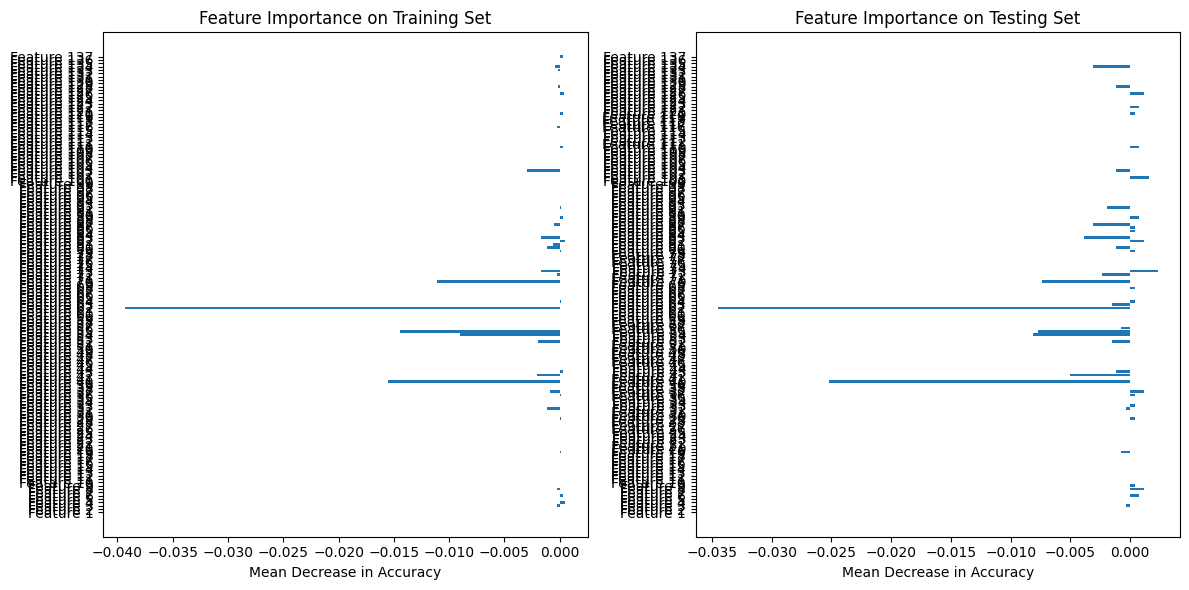

In [59]:
# To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split

# # Assume x and y are your full dataset and labels
# x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Reshape for scoring
X_train_reshaped = np.array(X_train).reshape((X_train.shape[0], X_train.shape[1]))
X_test_reshaped = np.array(X_test).reshape((X_test.shape[0], X_test.shape[1]))

# Calculate permutation importance on training data
train_results = permutation_importance(model, X_train_reshaped, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test_reshaped, y_test, scoring=score_func)

# Plotting
features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')

plt.tight_layout()
plt.show()

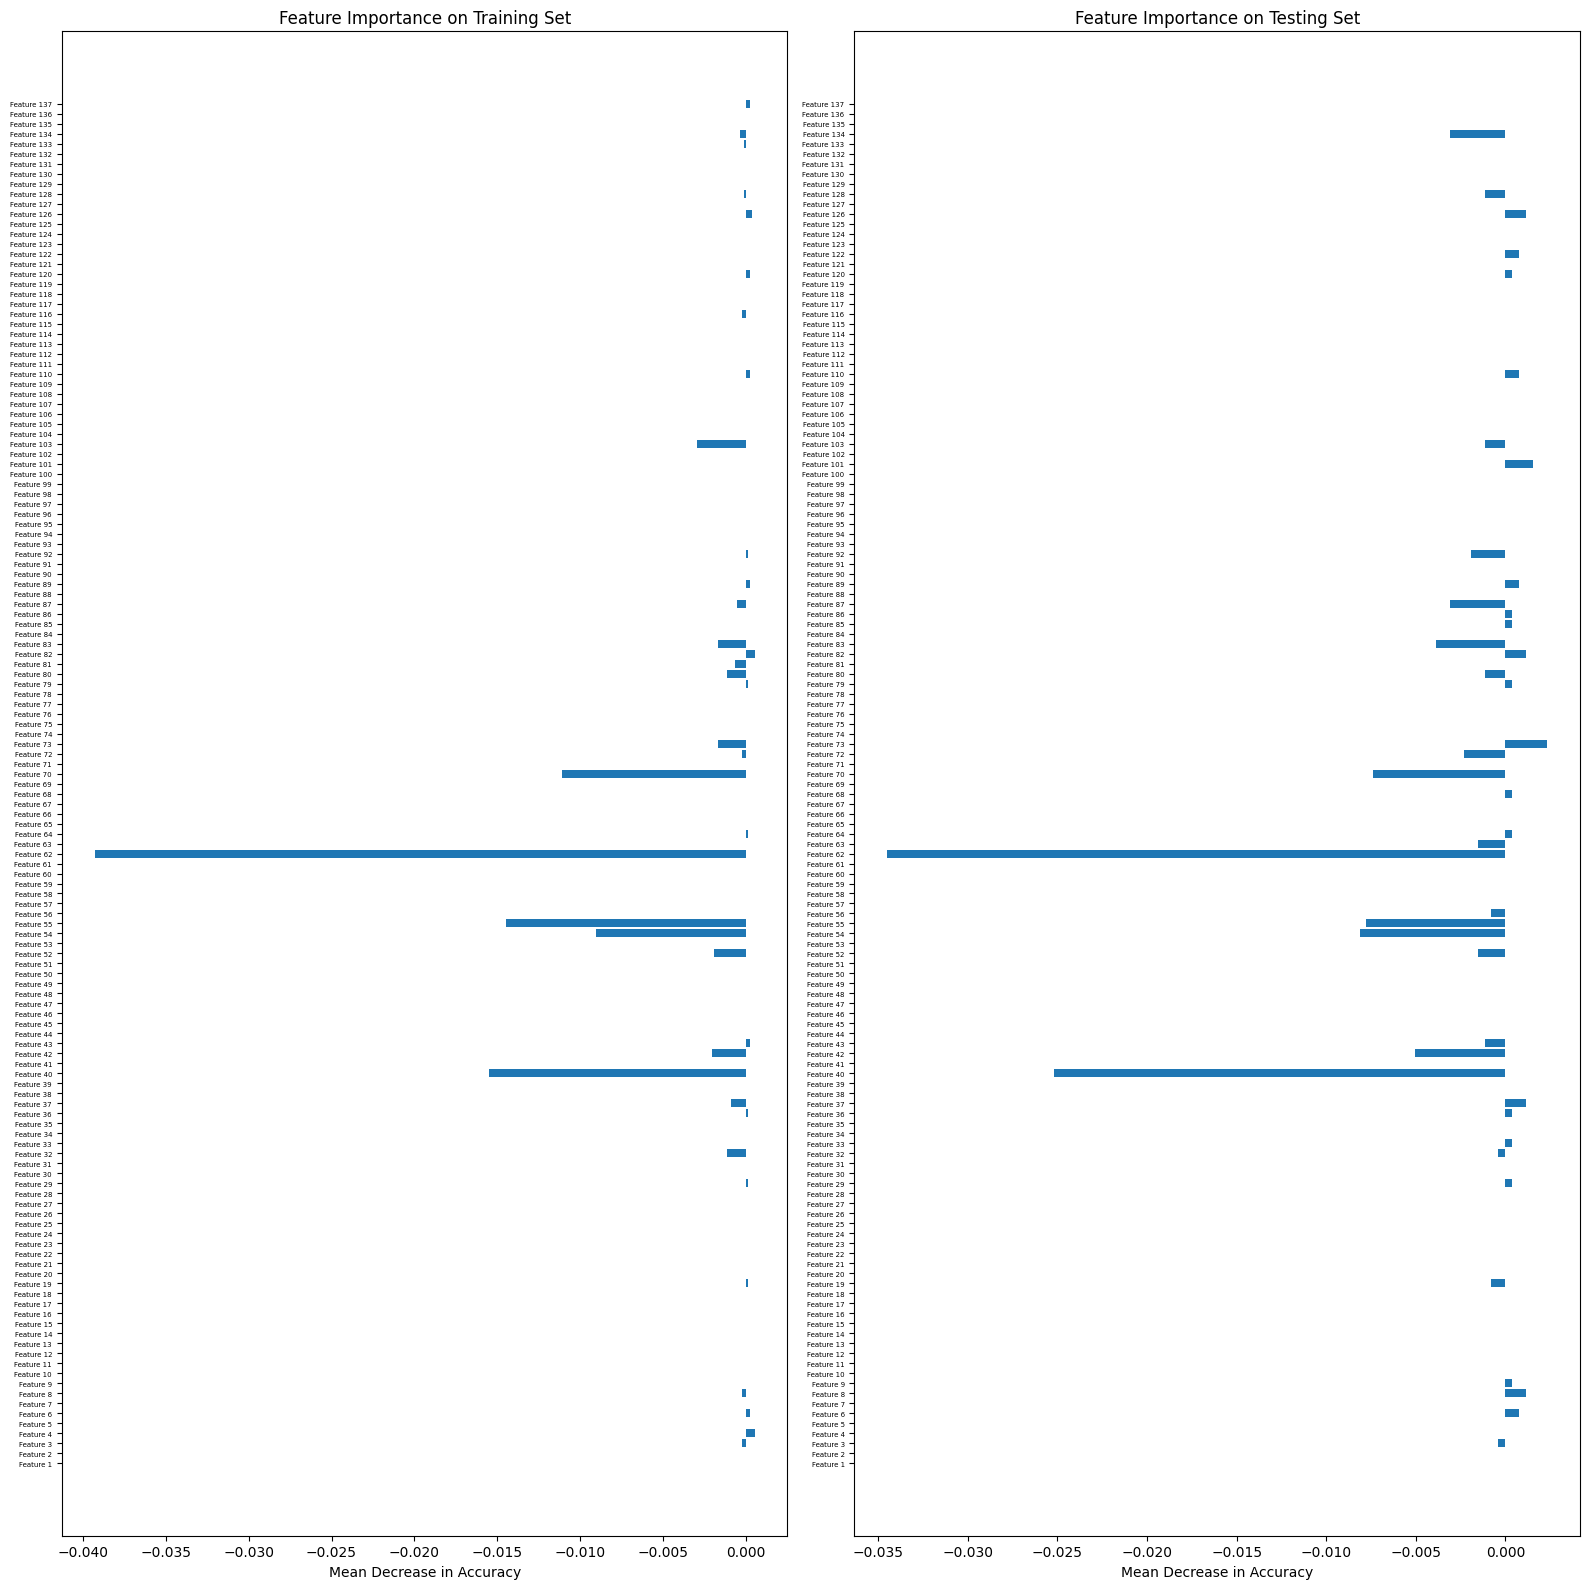

In [60]:
# Plotting
features = [f"Feature {i+1}" for i in range(X_train_reshaped.shape[1])]
plt.figure(figsize=(16, 16))
plt.subplot(1, 2, 1)
plt.barh(features, train_results.importances_mean)
plt.title('Feature Importance on Training Set')
plt.xlabel('Mean Decrease in Accuracy')
plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller

plt.subplot(1, 2, 2)
plt.barh(features, test_results.importances_mean)
plt.title('Feature Importance on Testing Set')
plt.xlabel('Mean Decrease in Accuracy')
plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller

plt.tight_layout()
plt.show()

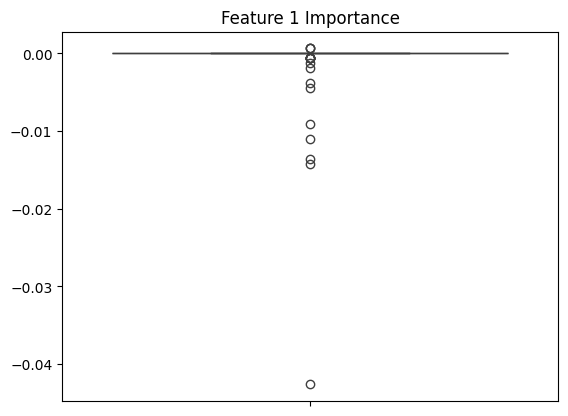

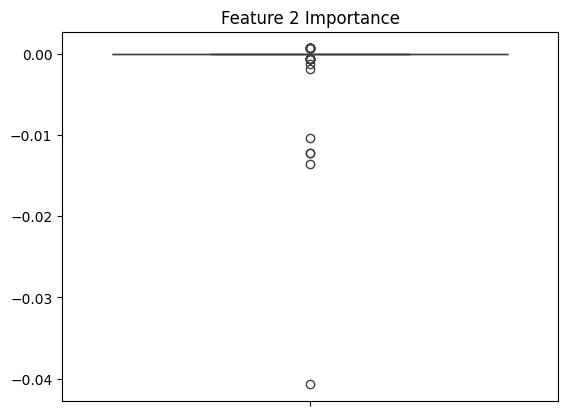

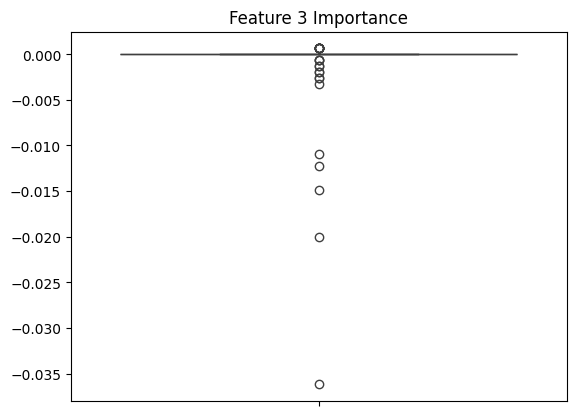

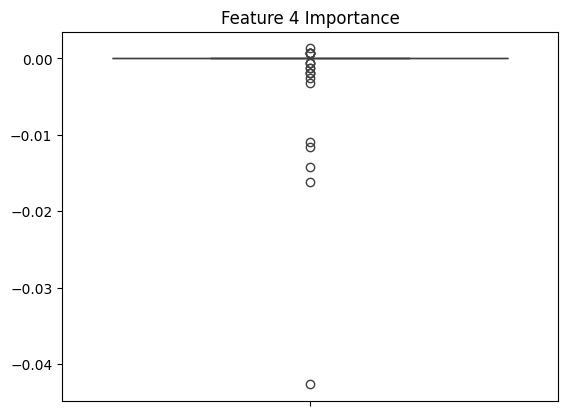

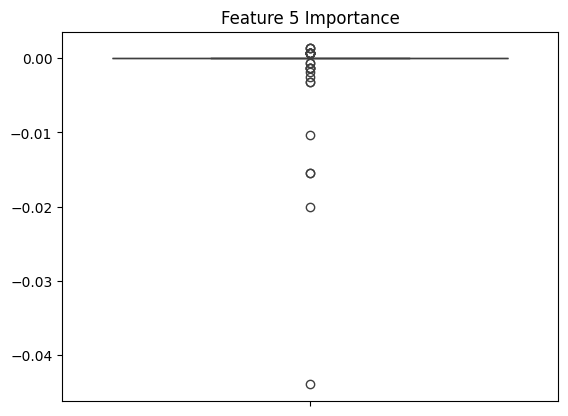

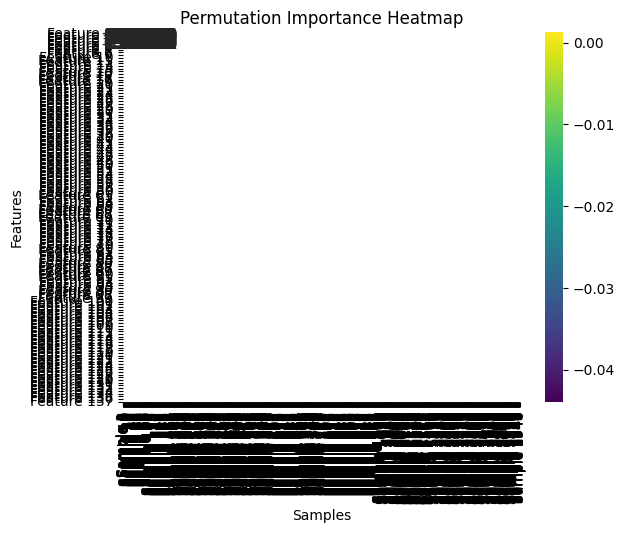

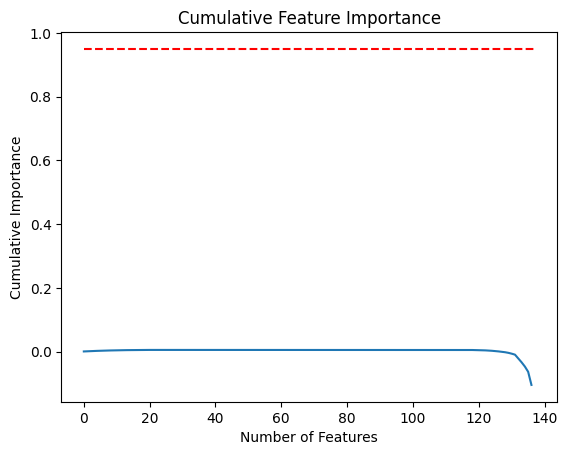

In [61]:
# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# To enhance the visualization of feature importance in your machine learning model, you can add a few more types of plots besides the basic bar plot. Here are a few additional types of visualizations you can implement:

# Box Plot:
# A box plot can show the distribution of permutation importances across multiple runs, giving you a sense of variability in feature importance.
import seaborn as sns

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

train_results = permutation_importance(model, X_train, y_train, scoring=score_func)
test_results = permutation_importance(model, X_test, y_test, scoring=score_func)

# Assuming 'results' is the output from permutation_importance
# for i in range(x_train_reshaped.shape[1]):
#     sns.boxplot(data=results.importances[:, i], orient='v')
#     plt.title(f'Feature {i+1} Importance')
#     plt.show()
# Correctly access the importances array
num_features = results.importances.shape[1]  # This ensures you are within the correct range

for i in range(num_features):
    sns.boxplot(data=results.importances[:, i], orient='v')
    plt.title(f'Feature {i+1} Importance')
    plt.show()

# Feature Importance Heatmap:
# If your dataset isn't too large, you can visualize the importance across multiple features and samples using a heatmap.
import seaborn as sns
# Create a heatmap of the feature importance scores
sns.heatmap(results.importances.T, annot=True, cmap='viridis', fmt=".3f",
            xticklabels=[f"Sample {i+1}" for i in range(X_train.shape[0])],
            yticklabels=[f"Feature {i+1}" for i in range(X_train.shape[1])])
plt.title('Permutation Importance Heatmap')
plt.xlabel('Samples')
plt.ylabel('Features')
plt.show()

# Cumulative Importance Plot:
# This plot can help identify the number of features required to reach a certain threshold of total importance.
import numpy as np
import matplotlib.pyplot as plt

# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()
# These visualizations provide different perspectives on feature importance, helping you to better understand which features contribute most to the model and how stable their contributions are across different data subsets.


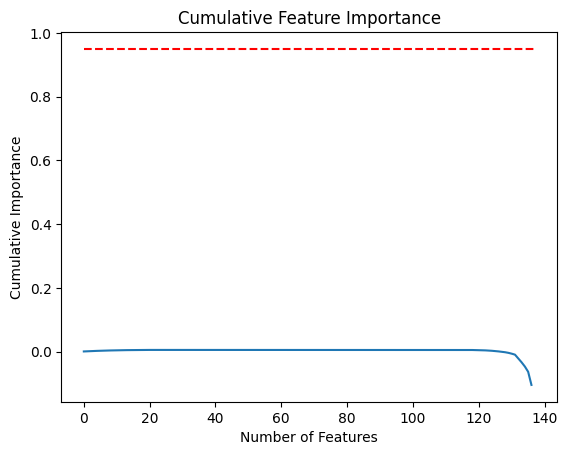

In [62]:
# Calculate cumulative importance
sorted_idx = np.argsort(results.importances_mean)[::-1]
cumulative_importance = np.cumsum(results.importances_mean[sorted_idx])

plt.plot(cumulative_importance)
plt.hlines(y=0.95, xmin=0, xmax=len(cumulative_importance), color='r', linestyles='dashed')
plt.title('Cumulative Feature Importance')
plt.xlabel('Number of Features')
plt.ylabel('Cumulative Importance')
plt.show()

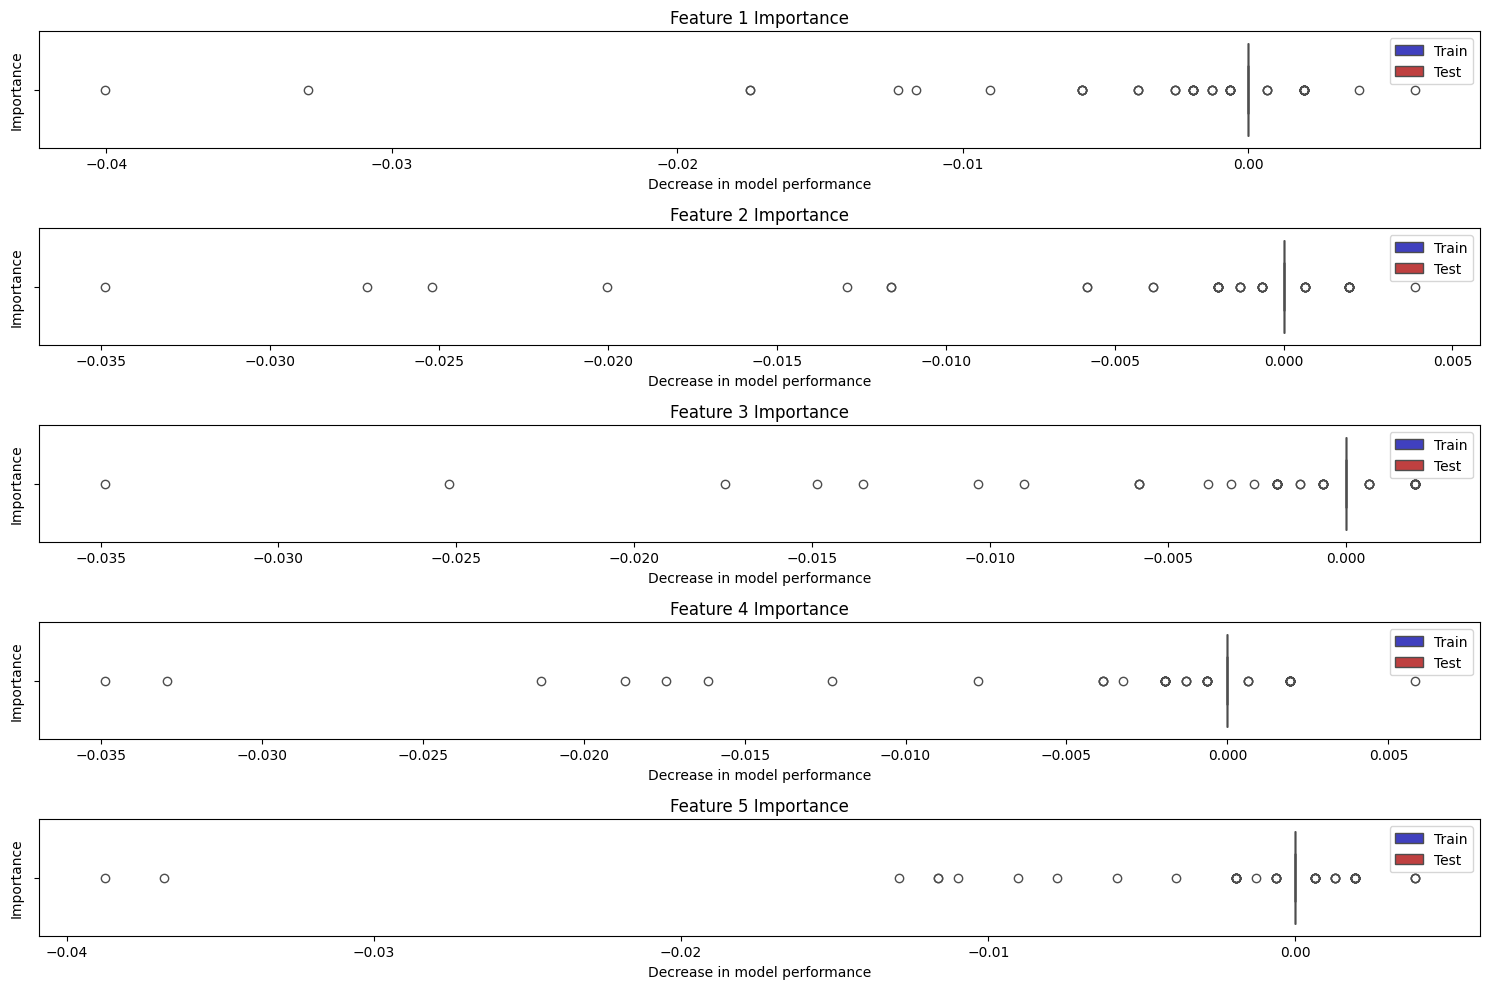

In [63]:
# To properly visualize permutation importance for both training and testing data in your machine learning model, let's refine the existing code to ensure correct use of both train_results and test_results. We will also plot these results side by side for each feature for better comparison.

import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'train_results' and 'test_results' are already calculated
num_features = train_results.importances.shape[1]

plt.figure(figsize=(15, 10))
for i in range(num_features):
    plt.subplot(num_features, 1, i + 1)
    # Plotting training data importance
    sns.boxplot(data=train_results.importances[:, i], color='blue', orient='h', saturation=0.5)
    # Plotting test data importance
    sns.boxplot(data=test_results.importances[:, i], color='red', orient='h', saturation=0.5)
    plt.title(f'Feature {i+1} Importance')
    plt.xlabel('Decrease in model performance')
    plt.ylabel('Importance')
    plt.legend(['Train', 'Test'])
plt.tight_layout()
plt.show()

# Explanation:
# Box Plot Modifications: Each feature's importance from both the training and testing datasets is plotted side by side to directly compare their distributions and see how the model reacts to the shuffling of each feature set.
# Layout Adjustments: Using plt.subplot() to plot each feature's importance on a separate subplot for clarity.
# Color Coding: Different colors for training and testing datasets help in distinguishing between the two, enhancing visual understanding.
# This code modification will help you clearly visualize how the permutation importance varies between training and testing datasets, thereby providing insights into model generalization and potential overfitting.

In [64]:
features, test_results.importances_mean


(['Feature 1',
  'Feature 2',
  'Feature 3',
  'Feature 4',
  'Feature 5',
  'Feature 6',
  'Feature 7',
  'Feature 8',
  'Feature 9',
  'Feature 10',
  'Feature 11',
  'Feature 12',
  'Feature 13',
  'Feature 14',
  'Feature 15',
  'Feature 16',
  'Feature 17',
  'Feature 18',
  'Feature 19',
  'Feature 20',
  'Feature 21',
  'Feature 22',
  'Feature 23',
  'Feature 24',
  'Feature 25',
  'Feature 26',
  'Feature 27',
  'Feature 28',
  'Feature 29',
  'Feature 30',
  'Feature 31',
  'Feature 32',
  'Feature 33',
  'Feature 34',
  'Feature 35',
  'Feature 36',
  'Feature 37',
  'Feature 38',
  'Feature 39',
  'Feature 40',
  'Feature 41',
  'Feature 42',
  'Feature 43',
  'Feature 44',
  'Feature 45',
  'Feature 46',
  'Feature 47',
  'Feature 48',
  'Feature 49',
  'Feature 50',
  'Feature 51',
  'Feature 52',
  'Feature 53',
  'Feature 54',
  'Feature 55',
  'Feature 56',
  'Feature 57',
  'Feature 58',
  'Feature 59',
  'Feature 60',
  'Feature 61',
  'Feature 62',
  'Feature 63',
 

In [65]:
X_axis


array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137])

/tmp/ipykernel_3619165/263249246.py:7: UserWarning:

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.



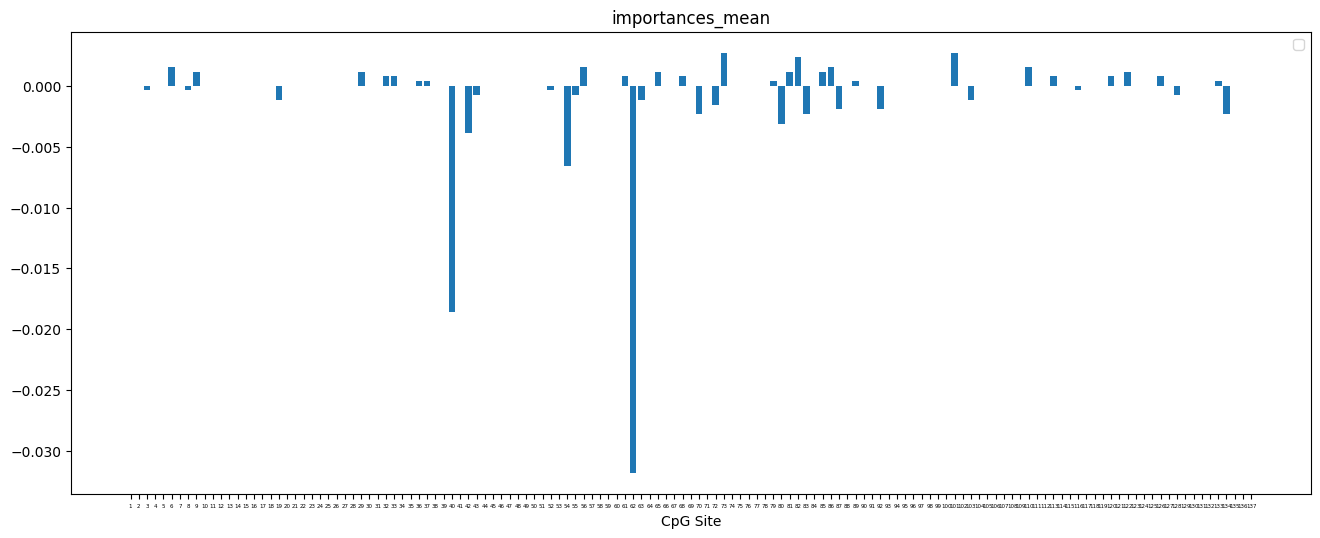

In [66]:
plt.figure(figsize=(16, 6))

# for i in range(1,3):
    # plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis, test_results.importances_mean) # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis)
# plt.yticks(fontsize=5)  # <-- Make y-axis labels smaller
plt.xticks(X_axis, fontsize=4)
plt.show()

In [67]:
shifts

[-0.4, -0.15]

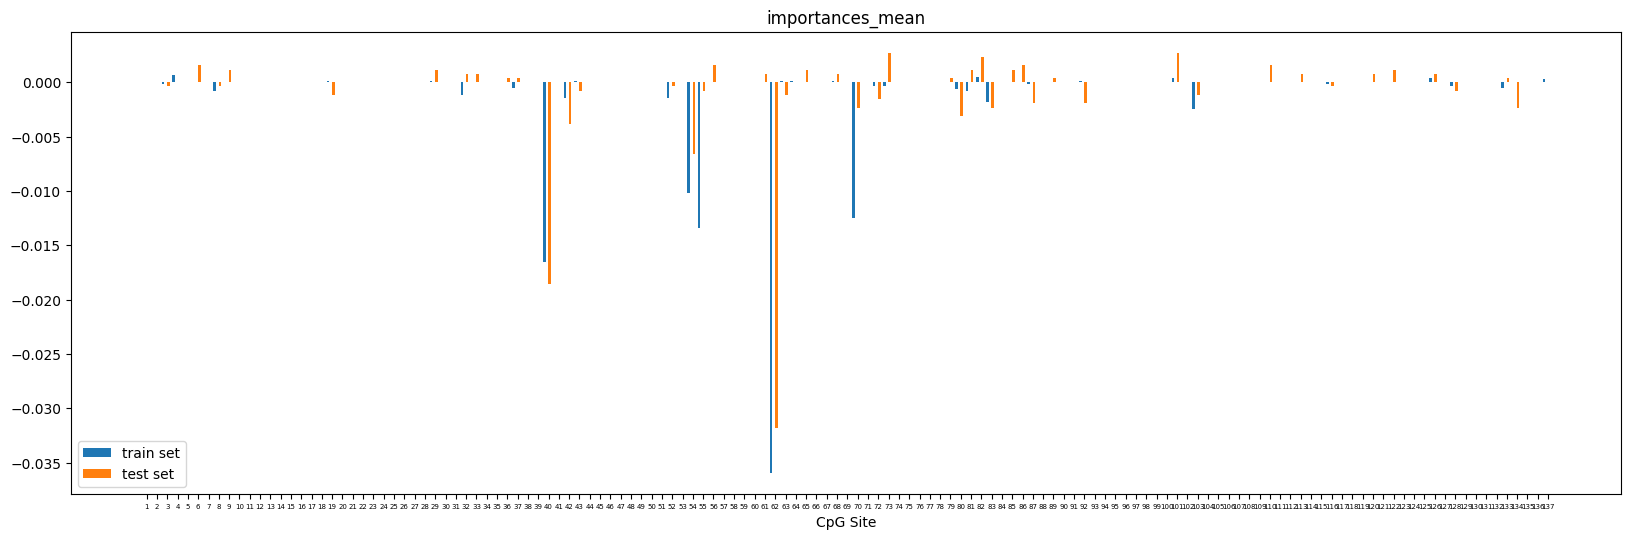

In [68]:
shifts =  [-0.4, 0.1]
# [-0.4, -0.15, 0.1]
# for i in range(1,3):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.figure(figsize=(20, 6))

plt.bar(X_axis+shifts[0], train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

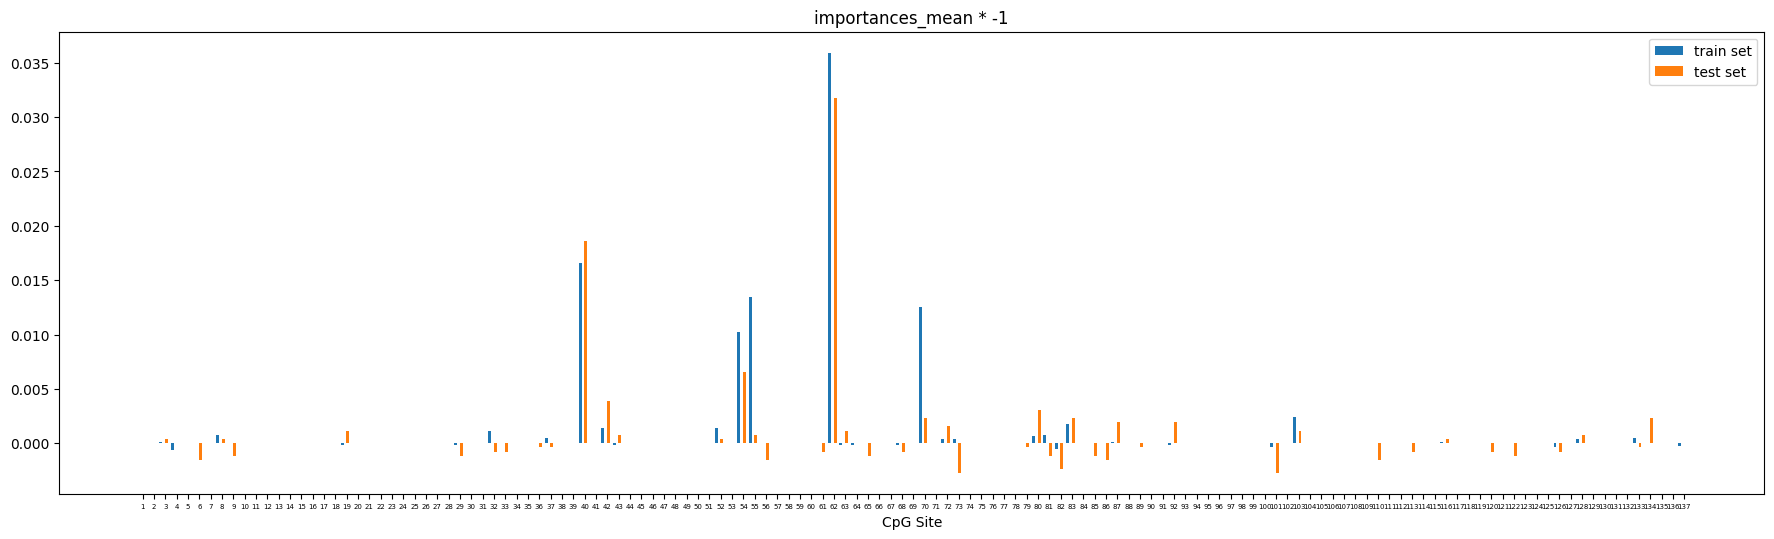

In [69]:
plt.figure(figsize=(22, 6))
plt.bar(X_axis+shifts[0], (-1)*train_results.importances_mean, .25,label="train set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
plt.bar(X_axis+shifts[1], (-1)*test_results.importances_mean, .25,label="test set") # X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])

plt.legend()
plt.title("importances_mean * -1")# Absolute Value of LASSO Coefficient")
plt.xlabel("CpG Site")
plt.xticks(X_axis, size=5)
plt.show()

In [70]:
print(np.argsort(-np.abs(model.coef_), axis=1)+1)
print(np.abs(model.coef_))

[[ 40  62  54  55  70 103  42  83 116  81  80  37  73  52 101  72  87  56
  134  64  32   8  79  89 126  63  92  68 110 133 128   6   3 120  95  76
   36  43  82  19  65  29   4 137 131  33 123 130  31   9  85  61 113  86
  122  34  51  12  21  25  30  13   7   5  28  18  20  24  15  57  59  58
   39  38  41  60  49  50  53  35  16  14  10  17  23   2   1  11  27  22
   26  44  45  46  47  48  96  94  93  91  90  88  84  77  71  69 104  97
  100  99 102  98 112 111 109 108 106 107 105 114 119 118 117  78  67  66
   74  75 127 125 121 124 115 132 135 129 136]]
[[0.00000000e+00 0.00000000e+00 2.55385091e-01 1.63561779e-01
  1.46133149e-02 2.58969174e-01 3.24011960e-02 4.78873816e-01
  1.14880510e-01 0.00000000e+00 0.00000000e+00 5.47643028e-02
  3.61064302e-02 0.00000000e+00 3.03974512e-07 0.00000000e+00
  0.00000000e+00 6.06447990e-03 1.88331892e-01 4.37868994e-03
  4.73837776e-02 0.00000000e+00 0.00000000e+00 4.24752996e-03
  3.89601079e-02 0.00000000e+00 0.00000000e+00 6.56785424e-03


In [71]:
celltypes

['unedited', 'silenced']

In [72]:
# for i in range(2):
#     plt.bar(X_axis+shifts[i], np.abs(model.coef_[i]), .25,label=celltypes[i])
# plt.legend()
# plt.title("Absolute Value of LASSO Coefficient")
# plt.xlabel("CpG Site")
# plt.xticks(X_axis)
# plt.show()

In [73]:

# train_idx, test_idx = train_test_split(np.arange(y_unedited_silenced.shape[0]), train_size=.75, random_state=16)
# train_idx, test_idx

In [74]:
# # To visualize feature importance for both training and testing datasets, we'll use bar plots to show the impact of each feature. Here is how you can enhance your Python script to include these visualizations using Matplotlib:

# import matplotlib.pyplot as plt
# import numpy as np
# from sklearn.inspection import permutation_importance
# from sklearn.model_selection import train_test_split

# # # Assume x and y are your full dataset and labels
# # x, y = np.random.rand(1000, 10, 1), np.random.rand(1000) * 100
# # x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# # Reshape for scoring
# x_train_reshaped = x_train.reshape((x_train.shape[0], x_train.shape[1]))
# x_test_reshaped = x_test.reshape((x_test.shape[0], x_test.shape[1]))

# # Calculate permutation importance on training data
# train_results = permutation_importance(model, x_train_reshaped, y_train, scoring=score_func)
# test_results = permutation_importance(model, x_test_reshaped, y_test, scoring=score_func)

# # Plotting
# features = [f"Feature {i+1}" for i in range(x_train_reshaped.shape[1])]
# plt.figure(figsize=(12, 6))
# plt.subplot(1, 2, 1)
# plt.barh(features, train_results.importances_mean)
# plt.title('Feature Importance on Training Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.subplot(1, 2, 2)
# plt.barh(features, test_results.importances_mean)
# plt.title('Feature Importance on Testing Set')
# plt.xlabel('Mean Decrease in Accuracy')

# plt.tight_layout()
# plt.show()